***
***

<center><h1><b>"Analisis Sentimen Pengguna Twitter tentang Pelaksanaan PON 2024" </b></center>

***
***

***

#<b>Alur Pengerjaan</b>

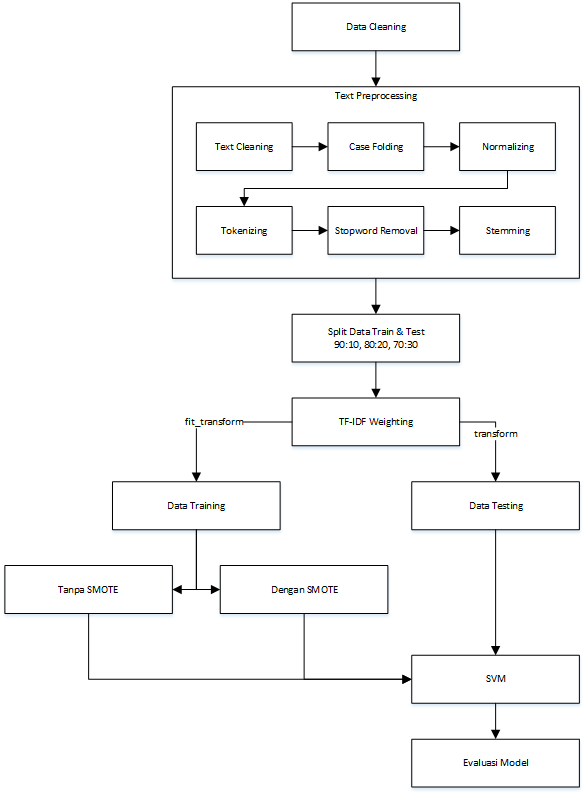

**1. Data Cleaning** </br>
Proses ini merupakan langkah awal yang sangat penting dalam analisis data, di mana data dibersihkan untuk memastikan kualitas dan konsistensinya. Langkah-langkah yang dilakukan dalam data cleaning meliputi pemilihan kolom-kolom yang relevan untuk analisis, identifikasi dan penghapusan duplikasi data yang dapat menyebabkan bias dalam hasil analisis, serta penanganan missing value, yang melibatkan penggantian atau penghapusan data yang hilang agar tidak mempengaruhi hasil akhir.

**2. Text Preprocessing**</br>
Text preprocessing adalah tahap penting dalam analisis teks yang mencakup berbagai langkah untuk mempersiapkan teks sebelum dianalisis lebih lanjut. Proses ini meliputi:
 * Text Cleaning: Menghapus tanda baca, simbol, atau karakter yang tidak diperlukan dari teks.
 * Casefolding: Mengonversi seluruh teks menjadi huruf kecil agar tidak ada perbedaan antara huruf besar dan kecil.
 * Normalizing: Mengubah bentuk singkatan atau variasi kata menjadi bentuk formal untuk konsistensi.
 * Tokenizing: Memecah teks menjadi unit-unit kecil seperti kata atau frasa.
 * Stopword Removal: Menghapus kata-kata umum yang tidak memiliki makna signifikan dalam analisis, seperti "dan", "atau", "yang".
 * Stemming: Mengembalikan kata ke bentuk dasarnya, sehingga kata-kata yang memiliki arti sama namun dalam bentuk yang berbeda diperlakukan sebagai entitas yang sama.

**3. Split Data Training dan Testing**</br>
Data dibagi menjadi dua bagian, yaitu data training dan data testing, dengan beberapa variasi rasio pembagian: 90:10, 80:20, dan 70:30. Tujuan pembagian ini adalah untuk melatih model menggunakan sebagian data (training) dan menguji performanya pada data yang belum pernah dilihat model sebelumnya (testing). Dengan mencoba berbagai rasio split, dapat dianalisis pengaruh ukuran data training terhadap kinerja model.

**4. Weighting (TF-IDF)**  </br>
TF-IDF (Term Frequency–Inverse Document Frequency) digunakan untuk mengubah data teks menjadi representasi numerik yang dapat diproses oleh algoritma machine learning. Teknik ini memberikan bobot pada setiap kata berdasarkan frekuensi kemunculannya dalam dokumen (TF) dan seberapa jarang kata tersebut muncul dalam seluruh korpus dokumen (IDF). Kata-kata umum seperti "dan", "yang", atau "di" memiliki bobot rendah, sementara kata-kata spesifik dan penting mendapatkan bobot lebih tinggi. Dengan demikian, fitur yang diekstraksi menjadi lebih bermakna dan relevan untuk proses klasifikasi.

**5. Oversampling (SMOTE)**  </br>
Untuk mengatasi masalah ketidakseimbangan kelas (class imbalance), dilakukan oversampling menggunakan teknik **SMOTE (Synthetic Minority Oversampling Technique)**. SMOTE menciptakan data sintetis baru dari kelas minoritas berdasarkan sampel yang ada, bukan hanya menduplikasi data. Dengan data yang lebih seimbang, model diharapkan dapat belajar dengan lebih adil dan meningkatkan performa dalam memprediksi semua kelas. Pengujian dilakukan dengan dua kondisi: model yang dilatih dengan SMOTE dan model tanpa SMOTE, guna membandingkan pengaruh oversampling terhadap kinerja model.

**6. Pembuatan Model (SVM)**  </br>
Model klasifikasi dibangun menggunakan algoritma **Support Vector Machine (SVM)** dengan empat jenis kernel berbeda:  
- **Linear**  
- **Polynomial**  
- **Radial Basis Function (RBF)**  
- **Sigmoid**  

Setiap kernel dievaluasi untuk mengetahui performanya pada dataset. Kernel terbaik kemudian dipilih untuk proses **hyperparameter tuning** agar kinerja model optimal. Setelah model terbaik diperoleh, model disimpan dalam format `.pkl` menggunakan pustaka **Pickle** agar dapat digunakan kembali tanpa perlu pelatihan ulang.

**7. Evaluasi Performa Model**</br>
Setelah model dilatih, kinerjanya dievaluasi menggunakan metrik evaluasi seperti confusion matrix dan classification report. Confusion matrix memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas, sementara classification report memberikan metrik seperti precision, recall, dan f1-score yang memberikan wawasan lebih mendalam tentang kinerja model dalam mengklasifikasikan data.

**8. Visualisasi Data Sentimen**</br>
Visualisasi data sentimen dilakukan untuk memberikan gambaran yang lebih jelas dan intuitif mengenai bagaimana distribusi sentimen tersebar dalam dataset. Visualisasi ini mencakup representasi grafik dari jumlah data berdasarkan kategori sentimen seperti positif, negatif, dan netral. Dengan menggunakan grafik batang, pie chart, atau word cloud, pengguna dapat lebih mudah memahami kecenderungan opini publik terhadap suatu topik. Selain itu, visualisasi ini membantu dalam mengidentifikasi pola-pola penting, seperti dominasi sentimen tertentu atau fluktuasi sentimen dari waktu ke waktu, yang dapat berguna dalam pengambilan keputusan dan analisis lanjutan.


***

#<b>1. Data Cleaning</b>


##<b>1.1 Read Data</b>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Membaca dataset dari path google drive
df = pd.read_csv('/content/drive/MyDrive/data_baru.csv')
df

,username,full_text,Label
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1.0
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1.0
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0.0
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0.0
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1.0
...,...,...,...
2498,ghena_ulyaa,PB PON Aceh tambah armada distribusi demi kesu...,1.0
2499,astrid_marf5,PON Aceh-Sumut mempercepat pembangunan fasilit...,1.0
2500,humaira_karimah,eSPORT PON Aceh-Sumut 2024 akan menjadi platfo...,1.0
2501,anaila_asgia3,Komunitas Counter Strike Online Pekalongan mem...,1.0


In [ ]:
# Melihat jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}\nJumlah kolom: {df.shape[1]}")

# Melihat Distribusi Kelas
print(f"Jumlah Masing-Masing Sentimen\n {df['Label'].value_counts()}")

Jumlah baris: 2503
Jumlah kolom: 3
Jumlah Masing-Masing Sentimen
 Label
-1.0    930
 1.0    925
 0.0    640
Name: count, dtype: int64


##<b>1.2 Memeriksa Missing Value</b>

In [ ]:
# Cek jumlah missing value per kolom
print(df.isnull().sum())

# Cetak baris yang memiliki missing value
print("\nBaris dengan missing value:")
missing_rows = df[df.isnull().any(axis=1)]

# Inisialisasi list untuk menyimpan indeks
missing_value_indices = []

for idx, row in missing_rows.iterrows():
    print(f"Index {idx} :\n{row['full_text']}\nLabel: {row['Label']}\n")
    missing_value_indices.append(idx)

print(f"Index dengan Missing Value: {missing_value_indices}")


username     0
full_text    0
Label        8
dtype: int64

Baris dengan missing value:
Index 907 :
Tim Futsal Jatim Gagal Raih Emas Puas dengan Peningkatan di PON 2024. Medan (https://t.co/ksziGGp1k3) Tim Futsal Jawa Timur harus puas dengan medali perak setelah kalah tipis 1-2 dari
Label: nan

Index 1342 :
H-3 Jelang Opening Ceremony PON XXI Pj Gubernur Safrizal Cek Kesiapan Komplek SHB https://t.co/pUulLifEUm
Label: nan

Index 1781 :
@Heraloebss Pon terbaik abad ini
Label: nan

Index 2154 :
Salut untuk kontingen DKI Jakarta atas pencapaian luar biasa di ajang PON XXI Aceh-Sumatera Utara 2024! Redaksi Beritajakarta mengapresiasi tinggi perjuangan kontingen yang telah memberikan upaya terbaiknya dalam mengharumkan nama DKI Jakarta. https://t.co/tgvNdjwmtf
Label: nan

Index 2160 :
baca berita tentang info penutupan PON medan yuk authornya si cantik. proud of rony and proud of youu meyy!! https://t.co/NhFwCfyftc https://t.co/m6PrDBYIc0
Label: nan

Index 2162 :
Otakku mungkin cetek tapi je

Terdapat **8 baris data** yang memiliki **nilai kosong** (**missing value**) pada kolom **label**. Kondisi ini terjadi karena pada saat proses **pelabelan**, beberapa baris tersebut terlewat sehingga tidak mendapatkan **label** yang semestinya. Untuk mengatasi hal ini, nilai **label** yang kosong akan diisi secara **manual** agar **data** menjadi lengkap dan dapat digunakan.


In [ ]:
# Mengisi Label secara manual
df.at[907, 'Label'] = 0
df.at[1342, 'Label'] = 0
df.at[1781, 'Label'] = 1
df.at[2154, 'Label'] = 1
df.at[2160, 'Label'] = 1
df.at[2162, 'Label'] = 0
df.at[2304, 'Label'] = 0
df.at[2309, 'Label'] = 0

# Cek jumlah missing value setelah pengisian
print("\nJumlah Missing Value Setelah Pengisian:")
print(df.isnull().sum())

# Menampilkan teks dan label setelah pengisian
print("\nBaris Setelah Pengisian Label:")
for idx in missing_value_indices:
    print(f"Index {idx} :\n{df.at[idx, 'full_text']}\nLabel: {df.at[idx, 'Label']}\n")


Jumlah Missing Value Setelah Pengisian:
username     0
full_text    0
Label        0
dtype: int64

Baris Setelah Pengisian Label:
Index 907 :
Tim Futsal Jatim Gagal Raih Emas Puas dengan Peningkatan di PON 2024. Medan (https://t.co/ksziGGp1k3) Tim Futsal Jawa Timur harus puas dengan medali perak setelah kalah tipis 1-2 dari
Label: 0.0

Index 1342 :
H-3 Jelang Opening Ceremony PON XXI Pj Gubernur Safrizal Cek Kesiapan Komplek SHB https://t.co/pUulLifEUm
Label: 0.0

Index 1781 :
@Heraloebss Pon terbaik abad ini
Label: 1.0

Index 2154 :
Salut untuk kontingen DKI Jakarta atas pencapaian luar biasa di ajang PON XXI Aceh-Sumatera Utara 2024! Redaksi Beritajakarta mengapresiasi tinggi perjuangan kontingen yang telah memberikan upaya terbaiknya dalam mengharumkan nama DKI Jakarta. https://t.co/tgvNdjwmtf
Label: 1.0

Index 2160 :
baca berita tentang info penutupan PON medan yuk authornya si cantik. proud of rony and proud of youu meyy!! https://t.co/NhFwCfyftc https://t.co/m6PrDBYIc0
Label: 1.

##<b>1.3 Menyesuaikan Tipe Data</b>

In [ ]:
# Menampilkan tipe data masing-masing kolom
print(df.dtypes)

username      object
full_text     object
Label        float64
dtype: object


Tipe data pada kolom **label** saat ini masih berupa **float**. Karena pembuatan model SVM memerlukan label dalam bentuk bilangan bulat (**integer**), maka tipe data pada kolom tersebut akan diubah dari **float** menjadi **int** agar sesuai dengan kebutuhan pemodelan.


In [ ]:
# Mengubah tipe data kolom 'Label' menjadi integer (int)
# agar sesuai format yang diperlukan oleh algoritma klasifikasi
df['Label'] = df['Label'].astype(int)

# Menampilkan tipe data masing-masing kolom
print(df.dtypes)

# Menampilkan data
df.head()

username     object
full_text    object
Label         int64
dtype: object


,username,full_text,Label
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1


In [ ]:
# Melihat jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}\nJumlah kolom: {df.shape[1]}")

# Melihat Distribusi Kelas
print(f"Jumlah Masing-Masing Sentimen\n {df['Label'].value_counts()}")

Jumlah baris: 2503
Jumlah kolom: 3
Jumlah Masing-Masing Sentimen
 Label
-1    930
 1    928
 0    645
Name: count, dtype: int64


***

#<b>2. Text Preprocessing</b>

##<b>2.1 Text Cleaning</b>

In [ ]:
import re

def text_cleaning(text):
    """
    Membersihkan teks dengan menghapus mention, hashtag, retweet prefix, URL, emotikon,
    karakter non-alfanumerik, HTML tags, dan menormalkan spasi. Termasuk juga menangani
    singkatan dan akronim dengan titik.

    Parameters:
    text (str): Teks yang akan dibersihkan.

    Returns:
    str: Teks yang telah dibersihkan.
    """
    # Menghapus URL
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()  # Normalisasi spasi


    # Menghapus entitas HTML umum seperti &amp; dan lainnya
    text = re.sub(r'&[a-zA-Z0-9#]+;', ' ', text)

    # Menghapus HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)

    # Menambahkan spasi di antara huruf dan titik
    text = re.sub(r'(?<=\w)\.(?=\w)', ' ', text)

    # Mengganti karakter non-breaking space dengan spasi biasa
    text = text.replace('\xa0', ' ')

    # Menghapus emotikon
    EMOJI_PATTERN = re.compile(
        "["
        "\U0001F1E0-\U0001F1FF"  # Flags
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "]"
    )
    text = re.sub(EMOJI_PATTERN, ' ', text)

    # Menghapus mention (misalnya, @username)
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)

    # Menghapus hashtag (misalnya, #hashtag)
    text = re.sub(r'#\w+', ' ', text)

    # Menghapus prefix "RT" yang sering digunakan di Twitter untuk retweet
    text = re.sub(r'^RT[\s]+', '', text)

    # Menghapus angka dan karakter non-alfanumerik selain spasi
    text = re.sub(r'[0-9]', ' ', text)  # Menghapus angka
    text = re.sub(r'[^A-Za-z ]', ' ', text)  # Menghapus karakter non-alfanumerik lainnya

    # Menghapus baris baru dan carriage return
    text = re.sub(r'[\n\r]', ' ', text)

    # Normalisasi spasi ganda menjadi satu spasi dan menghapus spasi ekstra di awal dan akhir
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
# Membuat salinan DataFrame
df_txt = df.copy()

# Menggunakan fungsi text_cleaning pada kolom 'full_text' dan menampilkan hasilnya di kolom baru 'cleaned_text'
df_txt['cleaned_text'] = df_txt['full_text'].apply(lambda x: text_cleaning(x))
df_txt

,username,full_text,Label,cleaned_text
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...
...,...,...,...,...
2498,ghena_ulyaa,PB PON Aceh tambah armada distribusi demi kesu...,1,PB PON Aceh tambah armada distribusi demi kesu...
2499,astrid_marf5,PON Aceh-Sumut mempercepat pembangunan fasilit...,1,PON Aceh Sumut mempercepat pembangunan fasilit...
2500,humaira_karimah,eSPORT PON Aceh-Sumut 2024 akan menjadi platfo...,1,eSPORT PON Aceh Sumut akan menjadi platform te...
2501,anaila_asgia3,Komunitas Counter Strike Online Pekalongan mem...,1,Komunitas Counter Strike Online Pekalongan mem...


##<b>2.2 Case Folding</b>

In [ ]:
def text_casefolding(text):
    """
    Mengubah semua huruf menjadi huruf kecil (case folding).

    Parameters:
    text (str): Teks yang akan diubah menjadi huruf kecil.

    Returns:
    str: Teks dalam huruf kecil.
    """
    return text.lower()

In [ ]:
# Menggunakan fungsi text_casefolding pada kolom 'cleaned_text' dan menampilkan hasilnya di kolom baru 'casefolding_text'
df_txt['casefolding_text'] = df_txt['cleaned_text'].apply(lambda x: text_casefolding(x))
df_txt

,username,full_text,Label,cleaned_text,casefolding_text
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...
...,...,...,...,...,...
2498,ghena_ulyaa,PB PON Aceh tambah armada distribusi demi kesu...,1,PB PON Aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...
2499,astrid_marf5,PON Aceh-Sumut mempercepat pembangunan fasilit...,1,PON Aceh Sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...
2500,humaira_karimah,eSPORT PON Aceh-Sumut 2024 akan menjadi platfo...,1,eSPORT PON Aceh Sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...
2501,anaila_asgia3,Komunitas Counter Strike Online Pekalongan mem...,1,Komunitas Counter Strike Online Pekalongan mem...,komunitas counter strike online pekalongan mem...


##<b>2.3 Normalizing</b>

In [ ]:
import re

# Dictionary normalisasi
normalization_dict = {
    "aja": "saja", "aj": "saja", "bbrp": "beberapa", "bgt": "banget",
    "bgtu": "begitu", "bikin": "membuat", "bkin": "bikin", "blm": "belum",
    "brp": "berapa", "bs": "bisa", "btw": "omong-omong", "dgn": "dengan",
    "dlm": "dalam", "dpt": "dapat", "dr": "dari", "dah": "sudah", "emang": "memang",
    "ga": "tidak", "gak": "tidak", "gk": "tidak", "kalo": "kalau",
    "klu": "kalau", "klo": "kalau", "km": "kamu", "kmrn": "kemarin",
    "krn": "karena", "liat": "lihat", "lg": "lagi", "lho": "loh",
    "makasih": "terima kasih", "mksh": "terima kasih", "nah": "",
    "ngga": "tidak", "nggak": "tidak", "nih": "ini", "ny": "nya",
    "ok": "oke", "oke": "oke", "okey": "oke", "org": "orang",
    "pdhl": "padahal", "pls": "tolong", "sampe": "sampai",
    "sdh": "sudah", "sih": "", "sm": "sama", "smua": "semua",
    "sy": "saya", "td": "tadi", "tdk": "tidak", "thx": "terima kasih",
    "tp": "tapi", "trs": "terus", "udh": "sudah", "udah": "sudah",
    "utk": "untuk", "y": "ya", "yaampun": "ya ampun", "yg": "yang",
}


# Fungsi untuk normalisasi teks
def text_normalize(text):
    """
    Menormalkan teks dengan menggantikan singkatan atau bentuk tidak formal dengan bentuk formal
    menggunakan normalization_dict global.

    Parameters:
    text (str): Teks yang akan dinormalisasi.

    Returns:
    str: Teks yang telah dinormalisasi.
    """
    # Mengganti singkatan atau kata tidak formal dengan bentuk formal menggunakan dictionary norm_list
    for key, value in normalization_dict.items():
        # Gunakan boundary \b untuk memastikan hanya kata yang terpisah yang diganti
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)

    # Normalisasi spasi ganda menjadi satu spasi dan menghapus spasi ekstra di awal dan akhir
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Menggunakan fungsi text_normalize pada kolom 'casefolding_text' dan menampilkan hasilnya di kolom baru 'norm_text'
df_txt['norm_text'] = df_txt['casefolding_text'].apply(lambda x: text_normalize(x))
df_txt.head(5)

,username,full_text,Label,cleaned_text,casefolding_text,norm_text
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...


##<b>2.4 Tokenizing</b>

In [ ]:
# Membagi teks pada kolom 'norm_text' menjadi token-token (kata-kata) berdasarkan spasi dan menampilkan hasilnya di kolom baru 'token_text'
df_txt['token_text'] = df_txt['norm_text'].apply(lambda x:x.split())
df_txt

,username,full_text,Label,cleaned_text,casefolding_text,norm_text,token_text
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,"[keindahan, venue, pon, membuat, setiap, perta..."
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,"[pon, bakal, jadi, event, yang, paling, dinant..."
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...,"[pertandingan, demi, pertandingan, di, esport,..."
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,"[jatim, meraih, medali, emas, pada, seluruh, n..."
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,"[yah, sayang, banget, ya, saaih, halilintar, g..."
...,...,...,...,...,...,...,...
2498,ghena_ulyaa,PB PON Aceh tambah armada distribusi demi kesu...,1,PB PON Aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,"[pb, pon, aceh, tambah, armada, distribusi, de..."
2499,astrid_marf5,PON Aceh-Sumut mempercepat pembangunan fasilit...,1,PON Aceh Sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,"[pon, aceh, sumut, mempercepat, pembangunan, f..."
2500,humaira_karimah,eSPORT PON Aceh-Sumut 2024 akan menjadi platfo...,1,eSPORT PON Aceh Sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,"[esport, pon, aceh, sumut, akan, menjadi, plat..."
2501,anaila_asgia3,Komunitas Counter Strike Online Pekalongan mem...,1,Komunitas Counter Strike Online Pekalongan mem...,komunitas counter strike online pekalongan mem...,komunitas counter strike online pekalongan mem...,"[komunitas, counter, strike, online, pekalonga..."


##<b>2.5 Stopwords Removal</b>

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Menambahkan stop words tambahan
more_stop_words = ["loh", "lah", "dong"]

# Mendapatkan stop words bawaan dan menambahkannya
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

# Membuat kamus baru untuk stop words
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def text_stopword(tokens):
    """
    Menghapus stop words dari list of tokens (kata-kata).
    :param tokens: list of tokens (kata-kata)
    :return: list of tokens setelah stop words dihapus
    """
    if isinstance(tokens, list):  # Memastikan input adalah list
        # Gabungkan list menjadi string untuk diproses oleh Sastrawi
        text = ' '.join(tokens)
        # Hapus stopwords menggunakan Sastrawi
        filtered_text = stop_words_remover_new.remove(text)
        # Pisahkan kembali string menjadi list of tokens
        return filtered_text.split()
    else:
        raise ValueError("Input harus berupa list of tokens")

In [ ]:
# Menggunakan fungsi text_remove_stopwords pada kolom 'token_text' dan menampilkan hasilnya di kolom baru 'swremove_text'
df_txt['swremove_text'] = df_txt['token_text'].apply(lambda x: text_stopword(x))
df_txt

,username,full_text,Label,cleaned_text,casefolding_text,norm_text,token_text,swremove_text
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,"[keindahan, venue, pon, membuat, setiap, perta...","[keindahan, venue, pon, membuat, pertandingan,..."
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,"[pon, bakal, jadi, event, yang, paling, dinant...","[pon, bakal, jadi, event, paling, dinantikan, ..."
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...,"[pertandingan, demi, pertandingan, di, esport,...","[pertandingan, pertandingan, esport, pon, aceh..."
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,"[jatim, meraih, medali, emas, pada, seluruh, n...","[jatim, meraih, medali, emas, seluruh, nomor, ..."
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,"[yah, sayang, banget, ya, saaih, halilintar, g...","[yah, sayang, banget, saaih, halilintar, gagal..."
...,...,...,...,...,...,...,...,...
2498,ghena_ulyaa,PB PON Aceh tambah armada distribusi demi kesu...,1,PB PON Aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,"[pb, pon, aceh, tambah, armada, distribusi, de...","[pb, pon, aceh, tambah, armada, distribusi, ke..."
2499,astrid_marf5,PON Aceh-Sumut mempercepat pembangunan fasilit...,1,PON Aceh Sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,"[pon, aceh, sumut, mempercepat, pembangunan, f...","[pon, aceh, sumut, mempercepat, pembangunan, f..."
2500,humaira_karimah,eSPORT PON Aceh-Sumut 2024 akan menjadi platfo...,1,eSPORT PON Aceh Sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,"[esport, pon, aceh, sumut, akan, menjadi, plat...","[esport, pon, aceh, sumut, menjadi, platform, ..."
2501,anaila_asgia3,Komunitas Counter Strike Online Pekalongan mem...,1,Komunitas Counter Strike Online Pekalongan mem...,komunitas counter strike online pekalongan mem...,komunitas counter strike online pekalongan mem...,"[komunitas, counter, strike, online, pekalonga...","[komunitas, counter, strike, online, pekalonga..."


##<b>2.6 Stemming</b>

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Proses Stemming memakan waktu yang cukup lama tergantung dari jumlah data
# Membuat objek StemmerFactory untuk inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer() # Membuat objek stemmer dari factory

def text_stemming(text):
    """
    Melakukan stemming pada daftar kata menggunakan objek stemmer dari Sastrawi.

    Parameters:
    text (list): Daftar kata (token) yang akan diproses.

    Returns:
    list: Daftar kata yang telah dilakukan stemming.
    """
    # Menggunakan list comprehension untuk melakukan stemming pada setiap kata dalam daftar
    return [stemmer.stem(word) for word in text]

In [ ]:
# Menggunakan fungsi text_stemming pada kolom 'swremove_text' dan menampilkan hasilnya di kolom baru 'stem_text'
df_txt['stem_text'] = df_txt['swremove_text'].apply(lambda x: ' '.join(text_stemming(x)))
df_txt

,username,full_text,Label,cleaned_text,casefolding_text,norm_text,token_text,swremove_text,stem_text
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,"[keindahan, venue, pon, membuat, setiap, perta...","[keindahan, venue, pon, membuat, pertandingan,...",indah venue pon buat tanding asa lebih magis
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,"[pon, bakal, jadi, event, yang, paling, dinant...","[pon, bakal, jadi, event, paling, dinantikan, ...",pon bakal jadi event paling nanti venue sudah ...
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...,"[pertandingan, demi, pertandingan, di, esport,...","[pertandingan, pertandingan, esport, pon, aceh...",tanding tanding esport pon aceh sumut prediksi...
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,"[jatim, meraih, medali, emas, pada, seluruh, n...","[jatim, meraih, medali, emas, seluruh, nomor, ...",jatim raih medali emas seluruh nomor cabang te...
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,"[yah, sayang, banget, ya, saaih, halilintar, g...","[yah, sayang, banget, saaih, halilintar, gagal...",yah sayang banget saaih halilintar gagal tampi...
...,...,...,...,...,...,...,...,...,...
2498,ghena_ulyaa,PB PON Aceh tambah armada distribusi demi kesu...,1,PB PON Aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,"[pb, pon, aceh, tambah, armada, distribusi, de...","[pb, pon, aceh, tambah, armada, distribusi, ke...",pb pon aceh tambah armada distribusi sukses po...
2499,astrid_marf5,PON Aceh-Sumut mempercepat pembangunan fasilit...,1,PON Aceh Sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,"[pon, aceh, sumut, mempercepat, pembangunan, f...","[pon, aceh, sumut, mempercepat, pembangunan, f...",pon aceh sumut cepat bangun fasilitas publik m...
2500,humaira_karimah,eSPORT PON Aceh-Sumut 2024 akan menjadi platfo...,1,eSPORT PON Aceh Sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,"[esport, pon, aceh, sumut, akan, menjadi, plat...","[esport, pon, aceh, sumut, menjadi, platform, ...",esport pon aceh sumut jadi platform baik tunju...
2501,anaila_asgia3,Komunitas Counter Strike Online Pekalongan mem...,1,Komunitas Counter Strike Online Pekalongan mem...,komunitas counter strike online pekalongan mem...,komunitas counter strike online pekalongan mem...,"[komunitas, counter, strike, online, pekalonga...","[komunitas, counter, strike, online, pekalonga...",komunitas counter strike online kalong beri du...


In [ ]:
# Fungsi untuk hapus kata
def remove_one_letter(text):
    return ' '.join([word for word in text.split() if len(word) > 1])

# Terapkan ke kolom 'stem_text'
df_txt['stem_text'] = df_txt['stem_text'].apply(remove_one_letter)
df_txt

,username,full_text,Label,cleaned_text,casefolding_text,norm_text,token_text,swremove_text,stem_text
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,"[keindahan, venue, pon, membuat, setiap, perta...","[keindahan, venue, pon, membuat, pertandingan,...",indah venue pon buat tanding asa lebih magis
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,"[pon, bakal, jadi, event, yang, paling, dinant...","[pon, bakal, jadi, event, paling, dinantikan, ...",pon bakal jadi event paling nanti venue sudah ...
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...,"[pertandingan, demi, pertandingan, di, esport,...","[pertandingan, pertandingan, esport, pon, aceh...",tanding tanding esport pon aceh sumut prediksi...
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,"[jatim, meraih, medali, emas, pada, seluruh, n...","[jatim, meraih, medali, emas, seluruh, nomor, ...",jatim raih medali emas seluruh nomor cabang te...
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,"[yah, sayang, banget, ya, saaih, halilintar, g...","[yah, sayang, banget, saaih, halilintar, gagal...",yah sayang banget saaih halilintar gagal tampi...
...,...,...,...,...,...,...,...,...,...
2498,ghena_ulyaa,PB PON Aceh tambah armada distribusi demi kesu...,1,PB PON Aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,pb pon aceh tambah armada distribusi demi kesu...,"[pb, pon, aceh, tambah, armada, distribusi, de...","[pb, pon, aceh, tambah, armada, distribusi, ke...",pb pon aceh tambah armada distribusi sukses po...
2499,astrid_marf5,PON Aceh-Sumut mempercepat pembangunan fasilit...,1,PON Aceh Sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,pon aceh sumut mempercepat pembangunan fasilit...,"[pon, aceh, sumut, mempercepat, pembangunan, f...","[pon, aceh, sumut, mempercepat, pembangunan, f...",pon aceh sumut cepat bangun fasilitas publik m...
2500,humaira_karimah,eSPORT PON Aceh-Sumut 2024 akan menjadi platfo...,1,eSPORT PON Aceh Sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,esport pon aceh sumut akan menjadi platform te...,"[esport, pon, aceh, sumut, akan, menjadi, plat...","[esport, pon, aceh, sumut, menjadi, platform, ...",esport pon aceh sumut jadi platform baik tunju...
2501,anaila_asgia3,Komunitas Counter Strike Online Pekalongan mem...,1,Komunitas Counter Strike Online Pekalongan mem...,komunitas counter strike online pekalongan mem...,komunitas counter strike online pekalongan mem...,"[komunitas, counter, strike, online, pekalonga...","[komunitas, counter, strike, online, pekalonga...",komunitas counter strike online kalong beri du...


In [ ]:
# Cek jumlah missing value per kolom
print(df_txt.isnull().sum())

username            0
full_text           0
Label               0
cleaned_text        0
casefolding_text    0
norm_text           0
token_text          0
swremove_text       0
stem_text           0
dtype: int64


In [ ]:
df_txt.to_csv('data_baru_pon_terproses.csv', index=False)

***

#<b>3. Split Data Train & Test</b>

In [ ]:
import pandas as pd

df_cleaned = pd.read_csv('data_baru_pon_terproses.csv')

In [ ]:
# Ekstrak data teks dan label dari DataFrame
twt_teks = df_cleaned['stem_text'].values  # Mengambil nilai teks yang telah diproses dari kolom 'stem_text'
twt_label = df_cleaned['Label'].values  # Mengambil nilai label yang telah di-encode dari kolom 'label_encoded'

# Menampilkan data teks dan label
print(twt_teks[:10], '\n')  # Menampilkan data teks
print(twt_label[:10])       # Menampilkan label


['indah venue pon buat tanding asa lebih magis'
 'pon bakal jadi event paling nanti venue sudah mantap'
 'tanding tanding esport pon aceh sumut prediksi langsung intens'
 'jatim raih medali emas seluruh nomor cabang tenis pon aceh sumut'
 'yah sayang banget saaih halilintar gagal tampil pon moga bangkit di sempat'
 'sumut cetak sejarah masuk besar cabor squash pon'
 'hasil lengkap bulu tangkis pon jateng juara umum emas'
 'menpora ri pasti pssi bakal investigasi insiden kontroversial pon xxi aceh sumut'
 'venue pon siap sepenuh suasana tanding lebih hebat'
 'personel sie propam polresta denpasar polda bal bripda made aldi sancitayasa hasil raih medali perak pon xxi aceh sumatera utara sumut tahun medali perak provinsi bal raih bripda made aldi sancitayasa cabang olahraga cabor pencak silat'] 

[ 1  1  0  0 -1  0  0 -1  1  1]


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

def perform_data_split(features, labels, test_ratio=0.2, random_seed=9):
    """
    Membagi data menjadi data latih dan data uji dengan proporsi tertentu.

    Parameters:
    - features: list atau array-like, data fitur
    - labels: list atau array-like, label target
    - test_ratio: float, proporsi data uji terhadap total data (default: 0.2)
    - random_seed: int, nilai seed untuk pengacakan (default: 9)

    Returns:
    - x_train, x_test, y_train, y_test
    """
    x_train, x_test, y_train, y_test = train_test_split(
        features,
        labels,
        test_size=test_ratio,
        random_state=random_seed,
        stratify=labels
    )

    # Menampilkan jumlah data
    print("\n"+"-"*50)
    print(f"Rasio Split (Training:Testing): {int((1-test_ratio)*100)}:{int(test_ratio*100)}")
    print(f"Jumlah data latih: {len(y_train)}")
    print(f"Jumlah data uji: {len(y_test)}")

    # Distribusi kelas di data latih
    print("\nDistribusi kelas di data latih:")
    for label, jumlah in Counter(y_train).items():
        print(f"Class {label}: {jumlah} data")

    # Distribusi kelas di data uji
    print("\nDistribusi kelas di data uji:")
    for label, jumlah in Counter(y_test).items():
        print(f"Class {label}: {jumlah} data")

    return x_train, x_test, y_train, y_test


In [ ]:
# Split 90:10
x_train_90, x_test_10, y_train_90, y_test_10 = perform_data_split(twt_teks, twt_label, test_ratio=0.1)

# Split 80:20
x_train_80, x_test_20, y_train_80, y_test_20 = perform_data_split(twt_teks, twt_label, test_ratio=0.2)

# Split 70:30
x_train_70, x_test_30, y_train_70, y_test_30 = perform_data_split(twt_teks, twt_label, test_ratio=0.3)



--------------------------------------------------
Rasio Split (Training:Testing): 90:10
Jumlah data latih: 2252
Jumlah data uji: 251

Distribusi kelas di data latih:
Class 1: 835 data
Class -1: 837 data
Class 0: 580 data

Distribusi kelas di data uji:
Class 1: 93 data
Class 0: 65 data
Class -1: 93 data

--------------------------------------------------
Rasio Split (Training:Testing): 80:20
Jumlah data latih: 2002
Jumlah data uji: 501

Distribusi kelas di data latih:
Class 1: 742 data
Class -1: 744 data
Class 0: 516 data

Distribusi kelas di data uji:
Class 1: 186 data
Class 0: 129 data
Class -1: 186 data

--------------------------------------------------
Rasio Split (Training:Testing): 70:30
Jumlah data latih: 1752
Jumlah data uji: 751

Distribusi kelas di data latih:
Class 1: 650 data
Class -1: 651 data
Class 0: 451 data

Distribusi kelas di data uji:
Class 1: 278 data
Class -1: 279 data
Class 0: 194 data


***

#<b>4. Weighting (TF-IDF)</b>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

def perform_tfidf(x_train, x_test, display_calc=False, rincian_dict=None):
    """
    Melakukan ekstraksi fitur TF-IDF pada data teks menggunakan TfidfVectorizer dari scikit-learn.

    Parameter:
    ----------
    x_train : list or array-like
        Kumpulan teks yang digunakan untuk pelatihan (training data).

    x_test : list or array-like
        Kumpulan teks yang digunakan untuk pengujian (testing data).

    display_calc : bool, default=False
        Jika True, akan menghitung dan menampilkan:
            - TF (Term Frequency) estimasi (dihitung dari TF-IDF / IDF)
            - IDF (Inverse Document Frequency)
            - Nilai akhir TF-IDF
        Selain itu, akan mengembalikan ketiga dataframe tersebut.

    Return:
    -------
    x_train_tfidf : scipy.sparse matrix
        Matriks hasil transformasi TF-IDF dari data training.

    x_test_tfidf : scipy.sparse matrix
        Matriks hasil transformasi TF-IDF dari data testing.

    tfidf_vectorizer : TfidfVectorizer
        Objek vectorizer yang telah di-fit pada x_train, dapat digunakan untuk transformasi lebih lanjut.

    """
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=0.9, sublinear_tf=True)

    # Menghitung TF-IDF untuk training dan testing data
    x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
    x_test_tfidf = tfidf_vectorizer.transform(x_test)

    tf_df = idf_df = tfidf_df = None

    if display_calc:
        # Tampilkan satu contoh sebelum TF-IDF
        print("Contoh sebelum TF-IDF (teks mentah):")
        print(x_train[0])  # Data pertama di x_train

        # Tampilkan satu contoh sesudah TF-IDF
        print("\nContoh sesudah TF-IDF (hasil vektorisasi):")
        print(x_train_tfidf[0])  # Data pertama setelah diubah TF-IDF
        print("\nTF-IDF array bentuk dense:")
        print(x_train_tfidf[0].toarray())

        # ===== Perhitungan TF, DF, dan TF-IDF =====
        # Ambil fitur (kata-kata) dari vectorizer
        feature_names = tfidf_vectorizer.get_feature_names_out()
        vector = x_train_tfidf[0]

        # Simpan hasil TF, DF, TF-IDF
        rows = []

        for col in vector.nonzero()[1]:
            word = feature_names[col]

            # Hitung TF (frekuensi kemunculan kata dalam dokumen)
            tf = x_train[0].split().count(word)

            # Hitung DF (jumlah dokumen yang mengandung kata ini)
            df = sum(1 for doc in x_train if word in doc.split())

            # TF-IDF dari output
            tfidf = vector[0, col]

            rows.append({"Kata": word, "TF": tf, "DF": df, "TF-IDF": tfidf})

        # Buat DataFrame untuk ditampilkan sebagai tabel
        tfidf_df = pd.DataFrame(rows)
        print("\nTabel perhitungan TF, DF, dan TF-IDF:")
        print(tfidf_df)

        # Additional calculations for TF and IDF if needed
        # (You would need to implement these based on your requirements)

    return x_train_tfidf, x_test_tfidf, tfidf_vectorizer

In [ ]:
# TF-IDF untuk split 90:10
x_train_tfidf_90, x_test_tfidf_10, tfidf_vectorizer_90 = perform_tfidf(
    x_train_90, x_test_10, display_calc=True
)

# TF-IDF untuk split 80:20
x_train_tfidf_80, x_test_tfidf_20, tfidf_vectorizer_80 = perform_tfidf(
    x_train_80, x_test_20, display_calc=False
)

# TF-IDF untuk split 70:30
x_train_tfidf_70, x_test_tfidf_30, tfidf_vectorizer_70 = perform_tfidf(
    x_train_70, x_test_30, display_calc=False
)


Contoh sebelum TF-IDF (teks mentah):
produk lokal sumut sinar pon xxi aceh sumut

Contoh sesudah TF-IDF (hasil vektorisasi):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 4432)>
  Coords	Values
  (0, 3148)	0.559958586488577
  (0, 2242)	0.42466376724158933
  (0, 3845)	0.2606031634399169
  (0, 3676)	0.615980416082274
  (0, 3093)	0.09195883506194696
  (0, 4389)	0.17201792044327102
  (0, 20)	0.14392564788297732

TF-IDF array bentuk dense:
[[0. 0. 0. ... 0. 0. 0.]]

Tabel perhitungan TF, DF, dan TF-IDF:
     Kata  TF    DF    TF-IDF
0  produk   1     5  0.559959
1   lokal   1    31  0.424664
2   sumut   2   911  0.260603
3   sinar   1     2  0.615980
4     pon   1  1962  0.091959
5     xxi   1   728  0.172018
6    aceh   1  1031  0.143926


***

#<b>5. Oversampling (SMOTE)</b>

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def apply_smote(x_train_tfidf, y_train, k_neighbors=5, random_seed=7, verbose=True):
    """
    Menerapkan SMOTE pada data latih.

    Parameters:
    - x_train_tfidf: array-like, fitur TF-IDF hasil pelatihan
    - y_train: array-like, label latih
    - k_neighbors: int, jumlah tetangga untuk SMOTE (default: 5)
    - random_seed: int, seed untuk reproduksibilitas (default: 7)
    - verbose: bool, jika True maka tampilkan ringkasan hasil SMOTE

    Returns:
    - x_train_smote: array-like, data fitur setelah SMOTE
    - y_train_smote: array-like, label setelah SMOTE
    """
    smote = SMOTE(k_neighbors=k_neighbors, random_state=random_seed)
    x_train_smote, y_train_smote = smote.fit_resample(x_train_tfidf, y_train)

    if verbose:
        print("\nSetelah SMOTE:")
        print(f"x_train_smote shape: {x_train_smote.shape}")
        print(f"y_train_smote shape: {y_train_smote.shape}")

        print("\nDistribusi kelas setelah SMOTE:")
        distribusi = Counter(y_train_smote)
        for label, jumlah in sorted(distribusi.items()):
            print(f"Class {label}: {jumlah} data")

    return x_train_smote, y_train_smote


In [ ]:
print("\nRasio Split 90:10")
x_train_smote_90, y_train_smote_90 = apply_smote(x_train_tfidf_90, y_train_90)

print("\nRasio Split 80:20")
x_train_smote_80, y_train_smote_80 = apply_smote(x_train_tfidf_80, y_train_80)

print("\nRasio Split 70:30")
x_train_smote_70, y_train_smote_70 = apply_smote(x_train_tfidf_70, y_train_70)


Rasio Split 90:10

Setelah SMOTE:
x_train_smote shape: (2511, 4432)
y_train_smote shape: (2511,)

Distribusi kelas setelah SMOTE:
Class -1: 837 data
Class 0: 837 data
Class 1: 837 data

Rasio Split 80:20

Setelah SMOTE:
x_train_smote shape: (2232, 4178)
y_train_smote shape: (2232,)

Distribusi kelas setelah SMOTE:
Class -1: 744 data
Class 0: 744 data
Class 1: 744 data

Rasio Split 70:30

Setelah SMOTE:
x_train_smote shape: (1953, 3900)
y_train_smote shape: (1953,)

Distribusi kelas setelah SMOTE:
Class -1: 651 data
Class 0: 651 data
Class 1: 651 data


***

#<b>6. Pembuatan Model (SVM)</b>

##<b>6.1 Pelatihan Model</b>

In [ ]:
from sklearn.svm import SVC

def create_svm_model(x_train, y_train, kernel_type='linear'):
    """
    Membuat dan melatih model Support Vector Machine (SVM) berdasarkan tipe kernel yang diberikan.

    Parameters:
    - x_train (array-like or sparse matrix): Fitur input untuk data latih.
    - y_train (array-like): Label target untuk data latih.
    - kernel_type (str): Jenis kernel yang akan digunakan oleh SVM. Pilihan yang valid adalah
      'linear', 'poly', 'rbf', atau 'sigmoid'. Defaultnya adalah 'linear'.

    Returns:
    - svm_model (SVC object): Model SVM yang telah dilatih.
    - None: Jika kernel_type tidak valid.

    Jika kernel_type tidak valid, maka fungsi akan mencetak pesan kesalahan dan mengembalikan None.
    """
    # Mengecek apakah kernel yang dipilih valid
    if kernel_type not in ['linear', 'poly', 'rbf', 'sigmoid']:
        print(f"Kernel '{kernel_type}' tidak valid. Pilih antara 'linear', 'poly', 'rbf', 'sigmoid'.")
        return None  # Jika tidak valid, kembalikan None
    else:
        # Membuat dan melatih model SVM
        svm_model = SVC(kernel=kernel_type, probability=True)
        svm_model.fit(x_train, y_train)
        print(f"Model SVM dengan kernel '{kernel_type}' berhasil dibuat dan dilatih.")
        return svm_model  # Kembalikan model yang telah dilatih


In [ ]:
# --------------------
# Model TANPA SMOTE
# --------------------

# Split 90:10
svm_90_linear = create_svm_model(x_train_tfidf_90, y_train_90, kernel_type='linear')
svm_90_poly = create_svm_model(x_train_tfidf_90, y_train_90, kernel_type='poly')
svm_90_rbf = create_svm_model(x_train_tfidf_90, y_train_90, kernel_type='rbf')
svm_90_sigmoid = create_svm_model(x_train_tfidf_90, y_train_90, kernel_type='sigmoid')

# Split 80:20
svm_80_linear = create_svm_model(x_train_tfidf_80, y_train_80, kernel_type='linear')
svm_80_poly = create_svm_model(x_train_tfidf_80, y_train_80, kernel_type='poly')
svm_80_rbf = create_svm_model(x_train_tfidf_80, y_train_80, kernel_type='rbf')
svm_80_sigmoid = create_svm_model(x_train_tfidf_80, y_train_80, kernel_type='sigmoid')

# Split 70:30
svm_70_linear = create_svm_model(x_train_tfidf_70, y_train_70, kernel_type='linear')
svm_70_poly = create_svm_model(x_train_tfidf_70, y_train_70, kernel_type='poly')
svm_70_rbf = create_svm_model(x_train_tfidf_70, y_train_70, kernel_type='rbf')
svm_70_sigmoid = create_svm_model(x_train_tfidf_70, y_train_70, kernel_type='sigmoid')

# --------------------
# Model DENGAN SMOTE
# --------------------

# Split 90:10 + SMOTE
svm_smote_90_linear = create_svm_model(x_train_smote_90, y_train_smote_90, kernel_type='linear')
svm_smote_90_poly = create_svm_model(x_train_smote_90, y_train_smote_90, kernel_type='poly')
svm_smote_90_rbf = create_svm_model(x_train_smote_90, y_train_smote_90, kernel_type='rbf')
svm_smote_90_sigmoid = create_svm_model(x_train_smote_90, y_train_smote_90, kernel_type='sigmoid')

# Split 80:20 + SMOTE
svm_smote_80_linear = create_svm_model(x_train_smote_80, y_train_smote_80, kernel_type='linear')
svm_smote_80_poly = create_svm_model(x_train_smote_80, y_train_smote_80, kernel_type='poly')
svm_smote_80_rbf = create_svm_model(x_train_smote_80, y_train_smote_80, kernel_type='rbf')
svm_smote_80_sigmoid = create_svm_model(x_train_smote_80, y_train_smote_80, kernel_type='sigmoid')

# Split 70:30 + SMOTE
svm_smote_70_linear = create_svm_model(x_train_smote_70, y_train_smote_70, kernel_type='linear')
svm_smote_70_poly = create_svm_model(x_train_smote_70, y_train_smote_70, kernel_type='poly')
svm_smote_70_rbf = create_svm_model(x_train_smote_70, y_train_smote_70, kernel_type='rbf')
svm_smote_70_sigmoid = create_svm_model(x_train_smote_70, y_train_smote_70, kernel_type='sigmoid')


Model SVM dengan kernel 'linear' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'poly' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'rbf' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'sigmoid' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'linear' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'poly' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'rbf' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'sigmoid' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'linear' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'poly' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'rbf' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'sigmoid' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'linear' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'poly' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'rbf' berhasil dibuat dan dilatih.
Model SVM dengan kernel 'sigmoid' berhasil dibuat dan dilatih.
Model SVM dengan kernel 

##<b>6.2 Performa Keseluruhan Model</b>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def get_model_performance(x_test_tfidf, y_test, model, kernel_type="", with_smote=False, split_ratio=""):
    """
    Mengevaluasi performa model SVM dan menampilkan hasil evaluasi visual dan metrik.

    Parameters:
    - x_test_tfidf: array-like, fitur uji dalam bentuk TF-IDF
    - y_test: array-like, label uji
    - model: model SVM yang sudah dilatih
    - kernel_type: str, jenis kernel (linear, poly, rbf, sigmoid)
    - with_smote: bool, True jika model dilatih dengan SMOTE
    - split_ratio: str, informasi rasio split data, misalnya "90:10"

    Returns:
    - akurasi, presisi, recall, f1: float, metrik evaluasi model
    """
    # Prediksi
    y_pred = model.predict(x_test_tfidf)

    # Info SMOTE dan rasio
    smote_status = "Dengan SMOTE" if with_smote else "Tanpa SMOTE"
    split_info = f"Rasio Split Data: {split_ratio}" if split_ratio else "Rasio Split Data: Tidak disebutkan"

    print(f"\n=== Evaluasi Model SVM ({smote_status}) ===")
    print(f"Kernel       : {kernel_type}")
    print(f"{split_info}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negatif(-1)', 'Netral(0)', 'Positif(1)'],
                yticklabels=['Negatif(-1)', 'Netral(0)', 'Positif(1)'])
    plt.title(f"Confusion Matrix (Kernel: {kernel_type}, {split_ratio}, {smote_status})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    print("=" * 50)

    # Mengembalikan metrik
    akurasi = report['accuracy']
    presisi = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    return split_ratio, smote_status, akurasi, presisi, recall, f1



=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Linear
Rasio Split Data: 90:10


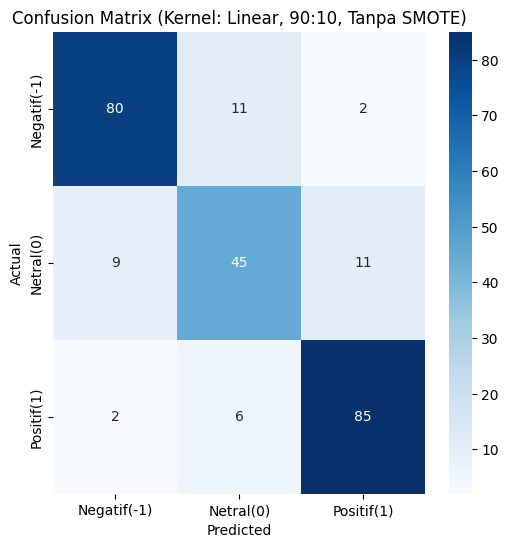


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.86      0.87        93
           0       0.73      0.69      0.71        65
           1       0.87      0.91      0.89        93

    accuracy                           0.84       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.84      0.84      0.84       251


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Polynomial
Rasio Split Data: 90:10


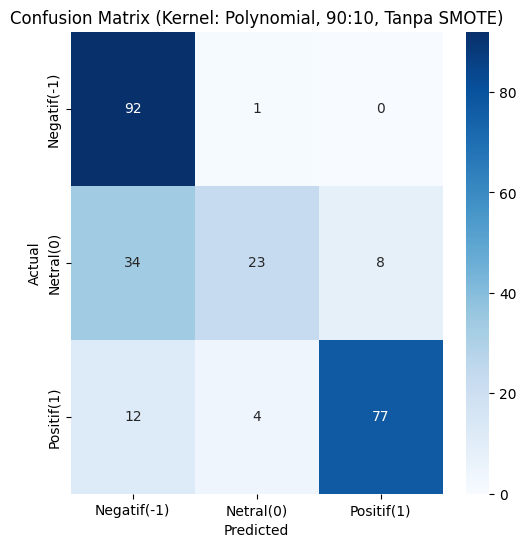


Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.99      0.80        93
           0       0.82      0.35      0.49        65
           1       0.91      0.83      0.87        93

    accuracy                           0.76       251
   macro avg       0.80      0.72      0.72       251
weighted avg       0.80      0.76      0.74       251


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : RBF
Rasio Split Data: 90:10


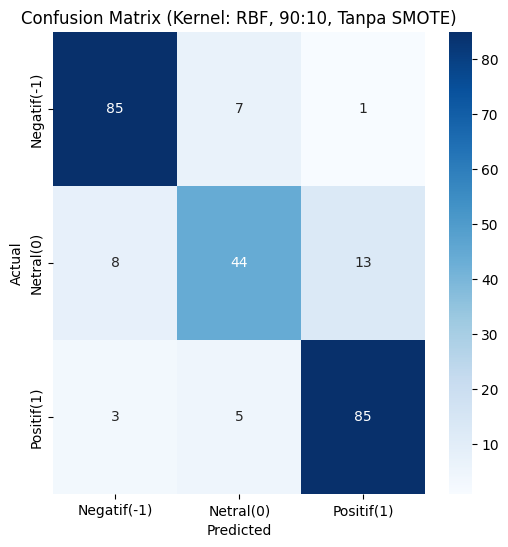


Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.91      0.90        93
           0       0.79      0.68      0.73        65
           1       0.86      0.91      0.89        93

    accuracy                           0.85       251
   macro avg       0.84      0.83      0.84       251
weighted avg       0.85      0.85      0.85       251


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Sigmoid
Rasio Split Data: 90:10


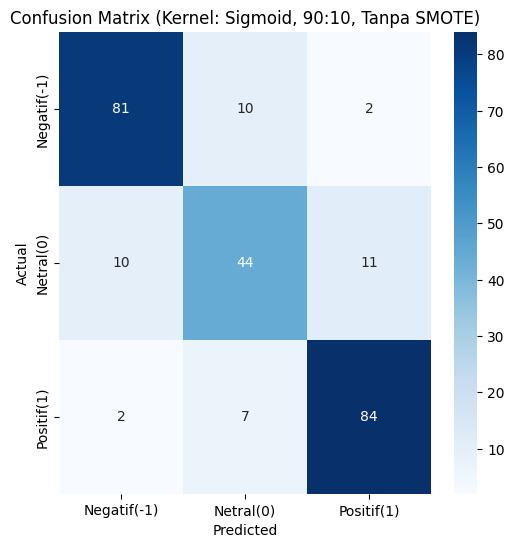


Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87        93
           0       0.72      0.68      0.70        65
           1       0.87      0.90      0.88        93

    accuracy                           0.83       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.83      0.83      0.83       251


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Linear
Rasio Split Data: 80:20


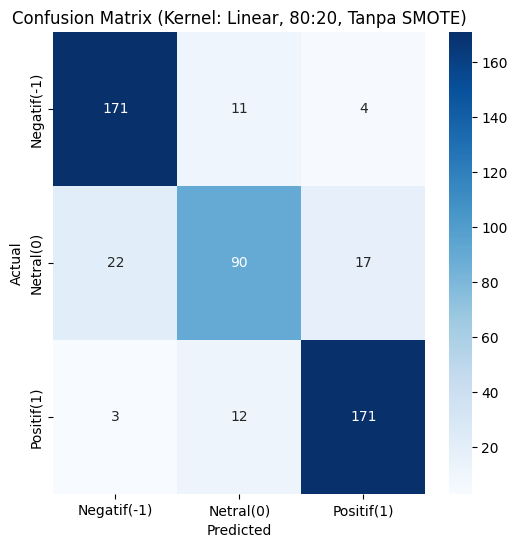


Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.92      0.90       186
           0       0.80      0.70      0.74       129
           1       0.89      0.92      0.90       186

    accuracy                           0.86       501
   macro avg       0.85      0.85      0.85       501
weighted avg       0.86      0.86      0.86       501


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Polynomial
Rasio Split Data: 80:20


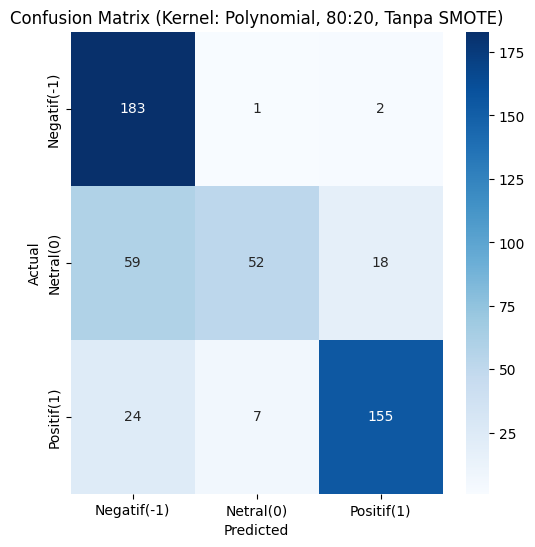


Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.98      0.81       186
           0       0.87      0.40      0.55       129
           1       0.89      0.83      0.86       186

    accuracy                           0.78       501
   macro avg       0.81      0.74      0.74       501
weighted avg       0.81      0.78      0.76       501


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : RBF
Rasio Split Data: 80:20


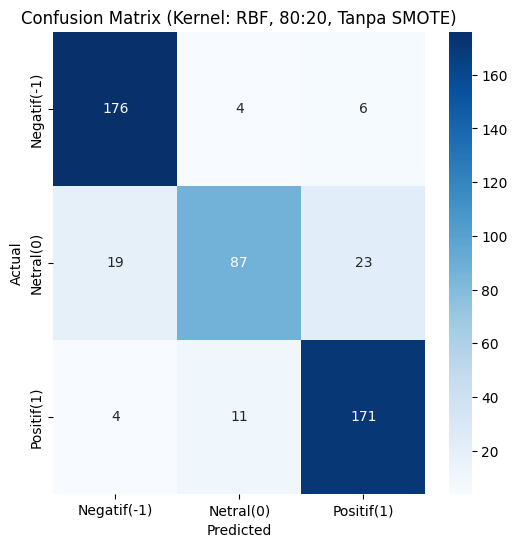


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.95      0.91       186
           0       0.85      0.67      0.75       129
           1       0.85      0.92      0.89       186

    accuracy                           0.87       501
   macro avg       0.86      0.85      0.85       501
weighted avg       0.87      0.87      0.86       501


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Sigmoid
Rasio Split Data: 80:20


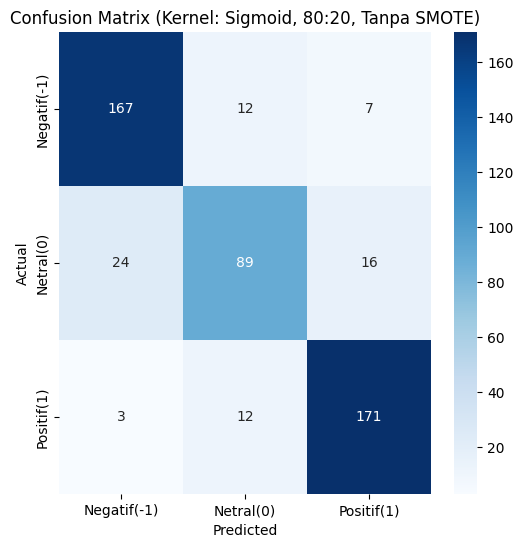


Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.90      0.88       186
           0       0.79      0.69      0.74       129
           1       0.88      0.92      0.90       186

    accuracy                           0.85       501
   macro avg       0.84      0.84      0.84       501
weighted avg       0.85      0.85      0.85       501


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Linear
Rasio Split Data: 70:30


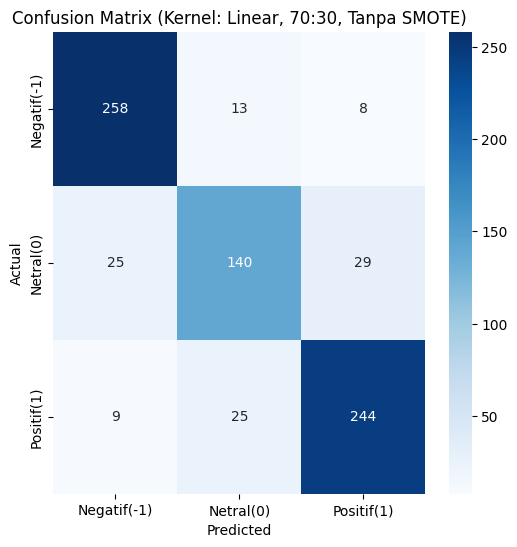


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       279
           0       0.79      0.72      0.75       194
           1       0.87      0.88      0.87       278

    accuracy                           0.85       751
   macro avg       0.85      0.84      0.84       751
weighted avg       0.85      0.85      0.85       751


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Polynomial
Rasio Split Data: 70:30


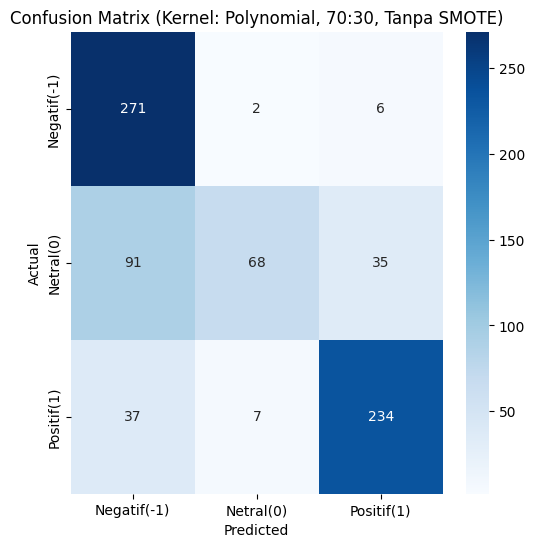


Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.97      0.80       279
           0       0.88      0.35      0.50       194
           1       0.85      0.84      0.85       278

    accuracy                           0.76       751
   macro avg       0.80      0.72      0.72       751
weighted avg       0.80      0.76      0.74       751


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : RBF
Rasio Split Data: 70:30


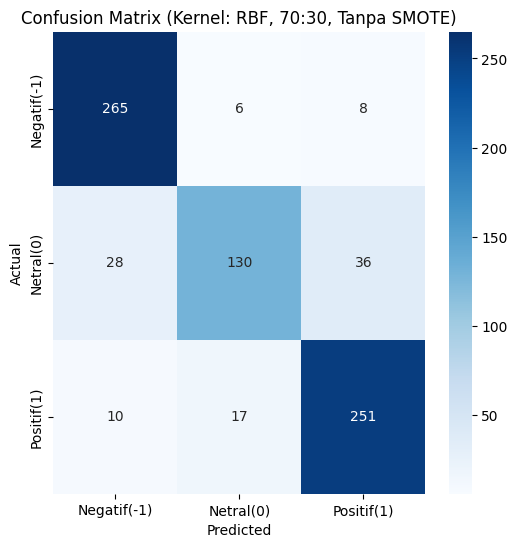


Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.95      0.91       279
           0       0.85      0.67      0.75       194
           1       0.85      0.90      0.88       278

    accuracy                           0.86       751
   macro avg       0.86      0.84      0.85       751
weighted avg       0.86      0.86      0.86       751


=== Evaluasi Model SVM (Tanpa SMOTE) ===
Kernel       : Sigmoid
Rasio Split Data: 70:30


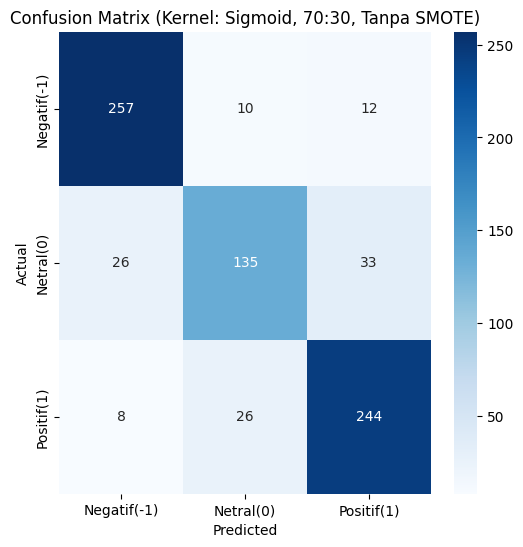


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       279
           0       0.79      0.70      0.74       194
           1       0.84      0.88      0.86       278

    accuracy                           0.85       751
   macro avg       0.84      0.83      0.83       751
weighted avg       0.84      0.85      0.84       751



In [ ]:
# === Evaluasi model SVM TANPA SMOTE ===

# Split 90:10
svm_90_linear_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_90_linear, kernel_type="Linear", with_smote=False, split_ratio="90:10")
svm_90_poly_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_90_poly, kernel_type="Polynomial", with_smote=False, split_ratio="90:10")
svm_90_rbf_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_90_rbf, kernel_type="RBF", with_smote=False, split_ratio="90:10")
svm_90_sigmoid_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_90_sigmoid, kernel_type="Sigmoid", with_smote=False, split_ratio="90:10")

# Split 80:20
svm_80_linear_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_80_linear, kernel_type="Linear", with_smote=False, split_ratio="80:20")
svm_80_poly_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_80_poly, kernel_type="Polynomial", with_smote=False, split_ratio="80:20")
svm_80_rbf_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_80_rbf, kernel_type="RBF", with_smote=False, split_ratio="80:20")
svm_80_sigmoid_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_80_sigmoid, kernel_type="Sigmoid", with_smote=False, split_ratio="80:20")

# Split 70:30
svm_70_linear_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_70_linear, kernel_type="Linear", with_smote=False, split_ratio="70:30")
svm_70_poly_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_70_poly, kernel_type="Polynomial", with_smote=False, split_ratio="70:30")
svm_70_rbf_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_70_rbf, kernel_type="RBF", with_smote=False, split_ratio="70:30")
svm_70_sigmoid_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_70_sigmoid, kernel_type="Sigmoid", with_smote=False, split_ratio="70:30")


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Linear
Rasio Split Data: 90:10


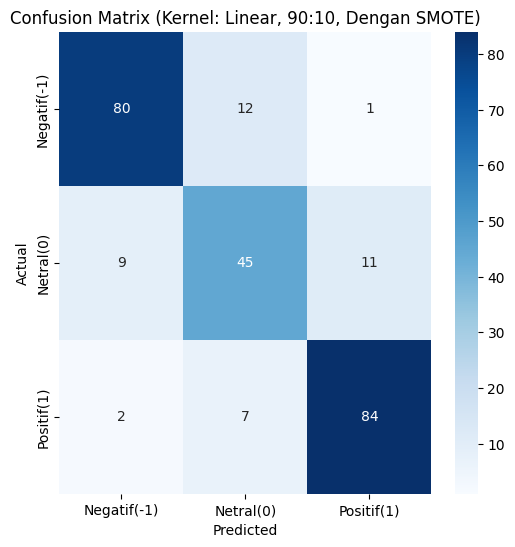


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.86      0.87        93
           0       0.70      0.69      0.70        65
           1       0.88      0.90      0.89        93

    accuracy                           0.83       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.83      0.83      0.83       251


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Polynomial
Rasio Split Data: 90:10


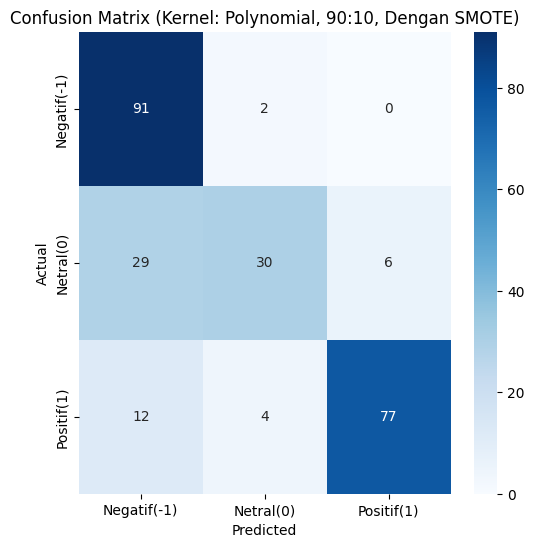


Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.98      0.81        93
           0       0.83      0.46      0.59        65
           1       0.93      0.83      0.88        93

    accuracy                           0.79       251
   macro avg       0.82      0.76      0.76       251
weighted avg       0.81      0.79      0.78       251


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : RBF
Rasio Split Data: 90:10


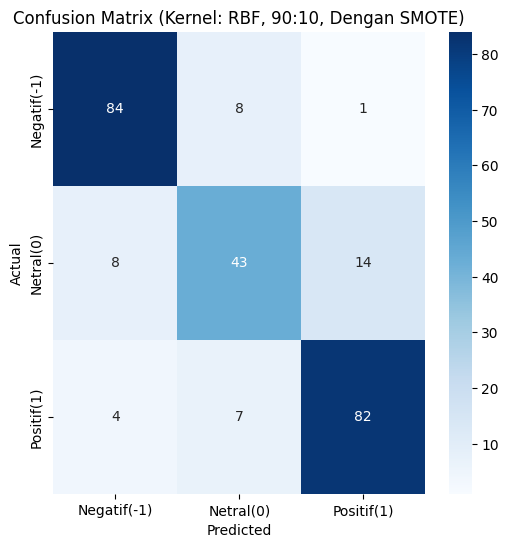


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.90      0.89        93
           0       0.74      0.66      0.70        65
           1       0.85      0.88      0.86        93

    accuracy                           0.83       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.83      0.83      0.83       251


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Sigmoid
Rasio Split Data: 90:10


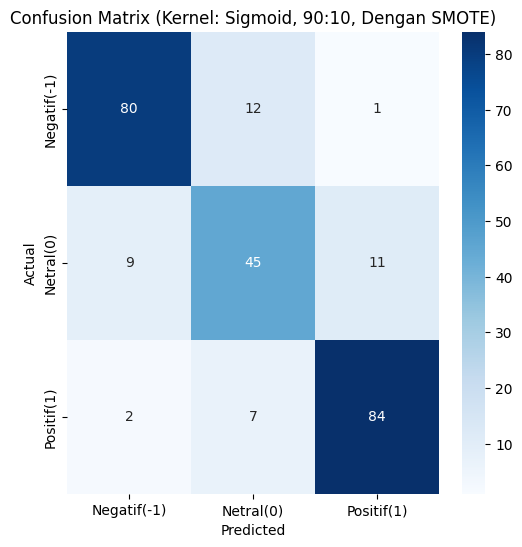


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.86      0.87        93
           0       0.70      0.69      0.70        65
           1       0.88      0.90      0.89        93

    accuracy                           0.83       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.83      0.83      0.83       251


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Linear
Rasio Split Data: 80:20


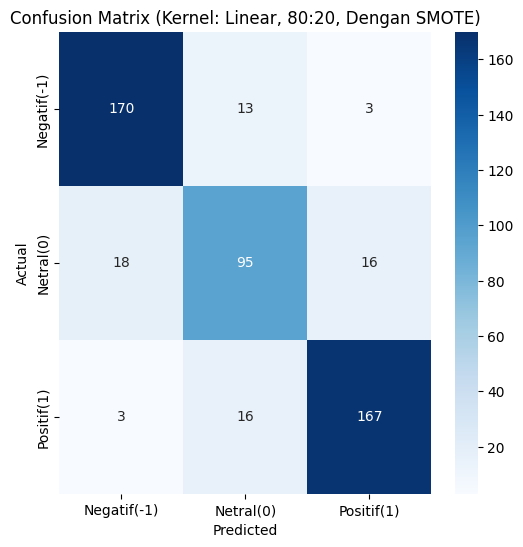


Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       186
           0       0.77      0.74      0.75       129
           1       0.90      0.90      0.90       186

    accuracy                           0.86       501
   macro avg       0.85      0.85      0.85       501
weighted avg       0.86      0.86      0.86       501


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Polynomial
Rasio Split Data: 80:20


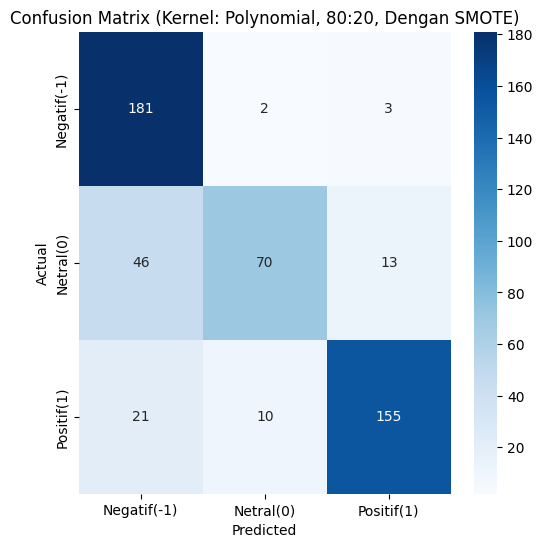


Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.97      0.83       186
           0       0.85      0.54      0.66       129
           1       0.91      0.83      0.87       186

    accuracy                           0.81       501
   macro avg       0.83      0.78      0.79       501
weighted avg       0.83      0.81      0.80       501


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : RBF
Rasio Split Data: 80:20


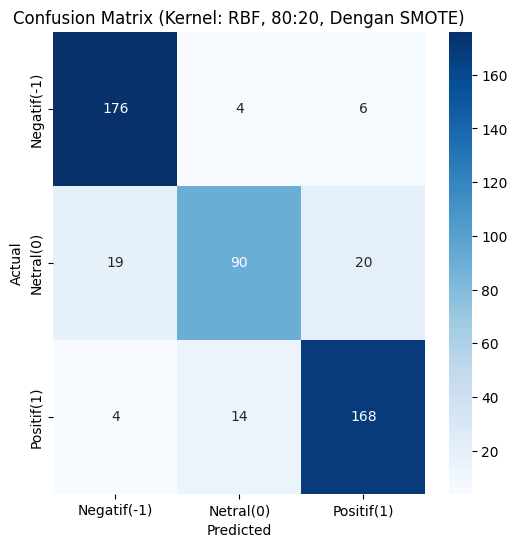


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.95      0.91       186
           0       0.83      0.70      0.76       129
           1       0.87      0.90      0.88       186

    accuracy                           0.87       501
   macro avg       0.86      0.85      0.85       501
weighted avg       0.86      0.87      0.86       501


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Sigmoid
Rasio Split Data: 80:20


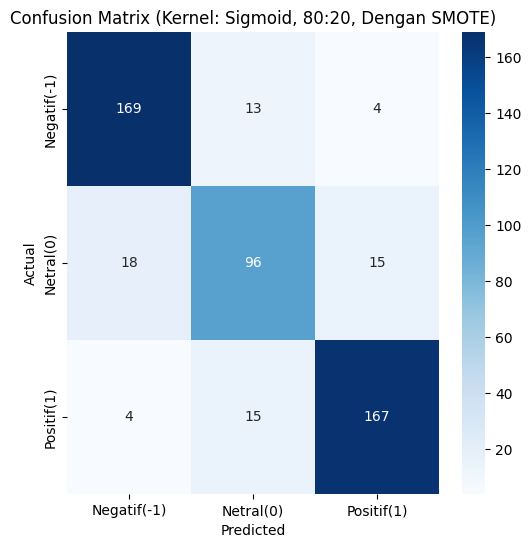


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.91      0.90       186
           0       0.77      0.74      0.76       129
           1       0.90      0.90      0.90       186

    accuracy                           0.86       501
   macro avg       0.85      0.85      0.85       501
weighted avg       0.86      0.86      0.86       501


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Linear
Rasio Split Data: 70:30


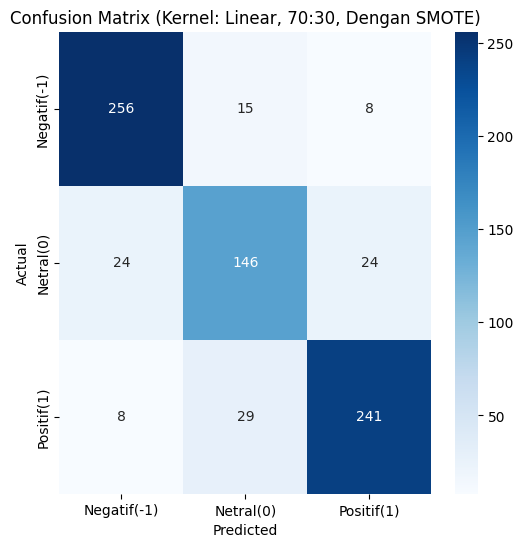


Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.92      0.90       279
           0       0.77      0.75      0.76       194
           1       0.88      0.87      0.87       278

    accuracy                           0.86       751
   macro avg       0.85      0.85      0.85       751
weighted avg       0.86      0.86      0.86       751


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Polynomial
Rasio Split Data: 70:30


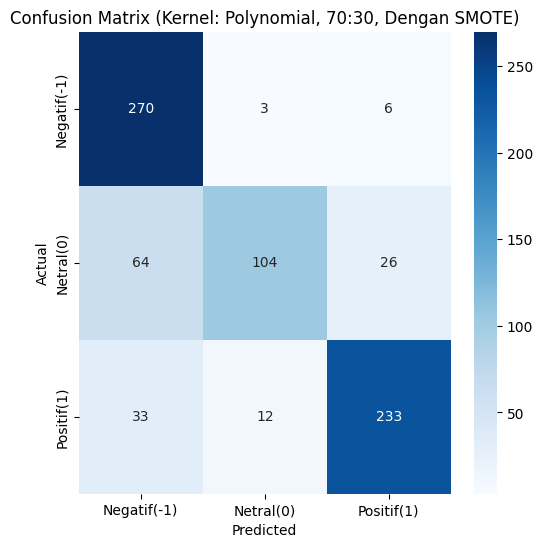


Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.97      0.84       279
           0       0.87      0.54      0.66       194
           1       0.88      0.84      0.86       278

    accuracy                           0.81       751
   macro avg       0.83      0.78      0.79       751
weighted avg       0.82      0.81      0.80       751


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : RBF
Rasio Split Data: 70:30


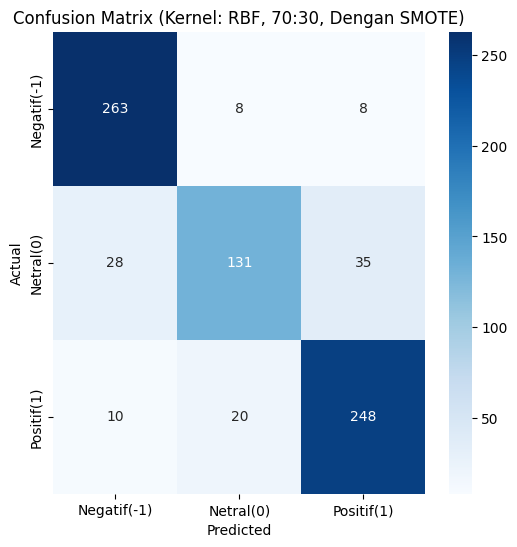


Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.94      0.91       279
           0       0.82      0.68      0.74       194
           1       0.85      0.89      0.87       278

    accuracy                           0.85       751
   macro avg       0.85      0.84      0.84       751
weighted avg       0.85      0.85      0.85       751


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : Sigmoid
Rasio Split Data: 70:30


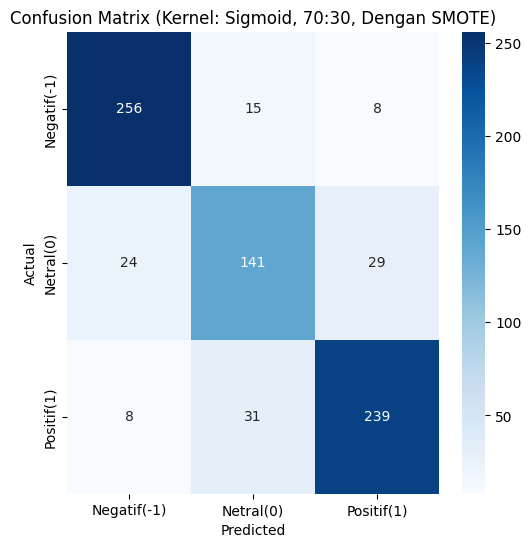


Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.92      0.90       279
           0       0.75      0.73      0.74       194
           1       0.87      0.86      0.86       278

    accuracy                           0.85       751
   macro avg       0.84      0.83      0.84       751
weighted avg       0.85      0.85      0.85       751



In [ ]:
# === Evaluasi model SVM DENGAN SMOTE ===

# Split 90:10
svm_smote_90_linear_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_smote_90_linear, kernel_type="Linear", with_smote=True, split_ratio="90:10")
svm_smote_90_poly_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_smote_90_poly, kernel_type="Polynomial", with_smote=True, split_ratio="90:10")
svm_smote_90_rbf_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_smote_90_rbf, kernel_type="RBF", with_smote=True, split_ratio="90:10")
svm_smote_90_sigmoid_score = get_model_performance(x_test_tfidf_10, y_test_10, svm_smote_90_sigmoid, kernel_type="Sigmoid", with_smote=True, split_ratio="90:10")

# Split 80:20
svm_smote_80_linear_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_smote_80_linear, kernel_type="Linear", with_smote=True, split_ratio="80:20")
svm_smote_80_poly_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_smote_80_poly, kernel_type="Polynomial", with_smote=True, split_ratio="80:20")
svm_smote_80_rbf_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_smote_80_rbf, kernel_type="RBF", with_smote=True, split_ratio="80:20")
svm_smote_80_sigmoid_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_smote_80_sigmoid, kernel_type="Sigmoid", with_smote=True, split_ratio="80:20")

# Split 70:30
svm_smote_70_linear_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_smote_70_linear, kernel_type="Linear", with_smote=True, split_ratio="70:30")
svm_smote_70_poly_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_smote_70_poly, kernel_type="Polynomial", with_smote=True, split_ratio="70:30")
svm_smote_70_rbf_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_smote_70_rbf, kernel_type="RBF", with_smote=True, split_ratio="70:30")
svm_smote_70_sigmoid_score = get_model_performance(x_test_tfidf_30, y_test_30, svm_smote_70_sigmoid, kernel_type="Sigmoid", with_smote=True, split_ratio="70:30")


In [ ]:
import pandas as pd

# Contoh daftar skor hasil dari pemanggilan fungsi get_model_performance
# Misalnya semua skor hasil evaluasi sudah disimpan dalam variabel seperti ini:
results = [
    svm_90_linear_score,
    svm_90_poly_score,
    svm_90_rbf_score,
    svm_90_sigmoid_score,
    svm_smote_90_linear_score,
    svm_smote_90_poly_score,
    svm_smote_90_rbf_score,
    svm_smote_90_sigmoid_score,
    svm_80_linear_score,
    svm_80_poly_score,
    svm_80_rbf_score,
    svm_80_sigmoid_score,
    svm_smote_80_linear_score,
    svm_smote_80_poly_score,
    svm_smote_80_rbf_score,
    svm_smote_80_sigmoid_score,
    svm_70_linear_score,
    svm_70_poly_score,
    svm_70_rbf_score,
    svm_70_sigmoid_score,
    svm_smote_70_linear_score,
    svm_smote_70_poly_score,
    svm_smote_70_rbf_score,
    svm_smote_70_sigmoid_score,
]

# Daftar kernel yang sesuai
kernel_list = ['Linear', 'Polynomial', 'RBF', 'Sigmoid'] * 6  # 4 kernel x 6 konfigurasi

# Buat DataFrame
perbandingan_svm = pd.DataFrame(results, columns=[
    'Rasio Split', 'SMOTE', 'Akurasi', 'Presisi', 'Recall', 'F1-Score'
])
perbandingan_svm.insert(0, 'Kernel', kernel_list)

# Tampilkan hasil
perbandingan_svm

,Kernel,Rasio Split,SMOTE,Akurasi,Presisi,Recall,F1-Score
0,Linear,90:10,Tanpa SMOTE,0.836653,0.835055,0.836653,0.835488
1,Polynomial,90:10,Tanpa SMOTE,0.764940,0.795378,0.764940,0.743781
2,RBF,90:10,Tanpa SMOTE,0.852590,0.849656,0.852590,0.849670
3,Sigmoid,90:10,Tanpa SMOTE,0.832669,0.830364,0.832669,0.831189
4,Linear,90:10,Dengan SMOTE,0.832669,0.832017,0.832669,0.832211
5,Polynomial,90:10,Dengan SMOTE,0.788845,0.814970,0.788845,0.777751
6,RBF,90:10,Dengan SMOTE,0.832669,0.829415,0.832669,0.830229
7,Sigmoid,90:10,Dengan SMOTE,0.832669,0.832017,0.832669,0.832211
8,Linear,80:20,Tanpa SMOTE,0.862275,0.859631,0.862275,0.859800
9,Polynomial,80:20,Tanpa SMOTE,0.778443,0.807396,0.778443,0.761113


In [ ]:
# Mengurutkan berdasarkan akurasi terbesar
perbandingan_svm_sorted = perbandingan_svm.sort_values(by='Akurasi', ascending=False)
perbandingan_svm_sorted

,Kernel,Rasio Split,SMOTE,Akurasi,Presisi,Recall,F1-Score
14,RBF,80:20,Dengan SMOTE,0.866267,0.864421,0.866267,0.863263
10,RBF,80:20,Tanpa SMOTE,0.866267,0.865393,0.866267,0.862323
8,Linear,80:20,Tanpa SMOTE,0.862275,0.859631,0.862275,0.859800
12,Linear,80:20,Dengan SMOTE,0.862275,0.861039,0.862275,0.861523
15,Sigmoid,80:20,Dengan SMOTE,0.862275,0.861171,0.862275,0.861589
18,RBF,70:30,Tanpa SMOTE,0.860186,0.859364,0.860186,0.856173
20,Linear,70:30,Dengan SMOTE,0.856192,0.855509,0.856192,0.855718
22,RBF,70:30,Dengan SMOTE,0.854860,0.852909,0.854860,0.851327
16,Linear,70:30,Tanpa SMOTE,0.854860,0.852854,0.854860,0.853313
2,RBF,90:10,Tanpa SMOTE,0.852590,0.849656,0.852590,0.849670


Berdasarkan hasil evaluasi model SVM dengan berbagai konfigurasi kernel, rasio split data, dan penggunaan SMOTE, dapat disimpulkan bahwa **kernel RBF (Radial Basis Function)** menunjukkan performa terbaik secara konsisten di berbagai skenario. Model terbaik secara keseluruhan diperoleh pada konfigurasi **kernel RBF dengan rasio split 80:20 dan menggunakan SMOTE**, yang menghasilkan nilai **akurasi 86,63%**, **presisi 86,44%**, **recall 86,63%**, dan **F1-score 86,33%**. Meskipun terdapat model dengan konfigurasi yang sama tanpa SMOTE yang memiliki akurasi identik (86,63%), penggunaan SMOTE tetap memberikan kontribusi positif pada nilai presisi dan F1-score, yang sedikit lebih tinggi dibandingkan model tanpa SMOTE.

Selanjutnya, model dengan **kernel Linear dan Sigmoid** juga menunjukkan performa cukup tinggi, terutama pada rasio split 80:20, baik dengan maupun tanpa SMOTE. Performa kernel Linear tanpa SMOTE pada split 80:20 menghasilkan F1-score sebesar 85,98%, yang hanya sedikit di bawah performa kernel RBF.

Sebaliknya, **kernel Polynomial** menunjukkan performa paling rendah di hampir semua rasio split, baik dengan maupun tanpa SMOTE. Nilai F1-score untuk model dengan kernel Polynomial berkisar antara **74% hingga 80%**, jauh di bawah model dengan kernel RBF, Linear, atau Sigmoid. Hal ini menunjukkan bahwa kernel Polynomial kurang cocok digunakan untuk data dan kasus ini.

Secara umum, **rasio split 80:20** cenderung memberikan hasil evaluasi model yang lebih stabil dan optimal dibandingkan rasio 70:30 maupun 90:10. Selain itu, penggunaan **SMOTE** dalam pelatihan data sering kali membantu meningkatkan performa model, terutama dalam hal **presisi** dan **F1-score**, meskipun peningkatannya tidak selalu signifikan.

Dengan demikian, dapat disimpulkan bahwa model **SVM dengan kernel RBF, rasio split 80:20, dan menggunakan SMOTE** adalah konfigurasi terbaik yang direkomendasikan untuk tugas klasifikasi sentimen pada dataset ini.


In [ ]:
df_dengan_smote = perbandingan_svm[perbandingan_svm['SMOTE'] == 'Dengan SMOTE'].reset_index(drop=True)
df_dengan_smote

,Kernel,Rasio Split,SMOTE,Akurasi,Presisi,Recall,F1-Score
0,Linear,90:10,Dengan SMOTE,0.832669,0.832017,0.832669,0.832211
1,Polynomial,90:10,Dengan SMOTE,0.788845,0.814970,0.788845,0.777751
2,RBF,90:10,Dengan SMOTE,0.832669,0.829415,0.832669,0.830229
3,Sigmoid,90:10,Dengan SMOTE,0.832669,0.832017,0.832669,0.832211
4,Linear,80:20,Dengan SMOTE,0.862275,0.861039,0.862275,0.861523
5,Polynomial,80:20,Dengan SMOTE,0.810379,0.827282,0.810379,0.802890
6,RBF,80:20,Dengan SMOTE,0.866267,0.864421,0.866267,0.863263
7,Sigmoid,80:20,Dengan SMOTE,0.862275,0.861171,0.862275,0.861589
8,Linear,70:30,Dengan SMOTE,0.856192,0.855509,0.856192,0.855718
9,Polynomial,70:30,Dengan SMOTE,0.808256,0.824548,0.808256,0.799891


In [ ]:
df_tanpa_smote = perbandingan_svm[perbandingan_svm['SMOTE'] == 'Tanpa SMOTE'].reset_index(drop=True)
df_tanpa_smote

,Kernel,Rasio Split,SMOTE,Akurasi,Presisi,Recall,F1-Score
0,Linear,90:10,Tanpa SMOTE,0.836653,0.835055,0.836653,0.835488
1,Polynomial,90:10,Tanpa SMOTE,0.764940,0.795378,0.764940,0.743781
2,RBF,90:10,Tanpa SMOTE,0.852590,0.849656,0.852590,0.849670
3,Sigmoid,90:10,Tanpa SMOTE,0.832669,0.830364,0.832669,0.831189
4,Linear,80:20,Tanpa SMOTE,0.862275,0.859631,0.862275,0.859800
5,Polynomial,80:20,Tanpa SMOTE,0.778443,0.807396,0.778443,0.761113
6,RBF,80:20,Tanpa SMOTE,0.866267,0.865393,0.866267,0.862323
7,Sigmoid,80:20,Tanpa SMOTE,0.852295,0.849628,0.852295,0.849837
8,Linear,70:30,Tanpa SMOTE,0.854860,0.852854,0.854860,0.853313
9,Polynomial,70:30,Tanpa SMOTE,0.762983,0.795438,0.762983,0.739897


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd

def plot_accuracy_by_kernel(data: pd.DataFrame, smote_status: str):
    """
    Visualisasi perbandingan akurasi model SVM berdasarkan kernel dan rasio split.

    Parameters:
    - data: pd.DataFrame, data hasil evaluasi model
    - smote_status: str, 'Dengan SMOTE' atau 'Tanpa SMOTE'
    """
    # Filter sesuai SMOTE status
    df_filtered = data[data['SMOTE'] == smote_status]

    # Pastikan urutan konsisten
    kernel_order = ['Linear', 'RBF', 'Polynomial', 'Sigmoid']
    split_order = ['70:30', '80:20', '90:10']

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='Kernel', y='Akurasi', hue='Rasio Split',
        hue_order=split_order,
        order=kernel_order,
        width=0.6, gap=0.1
    )

    plt.title(f'Perbandingan Akurasi per Kernel berdasarkan Rasio Split ({smote_status})')
    plt.ylabel('Akurasi')
    plt.xlabel('Kernel SVM')
    plt.ylim(0, 1)
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
    plt.legend(title='Rasio Split', loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


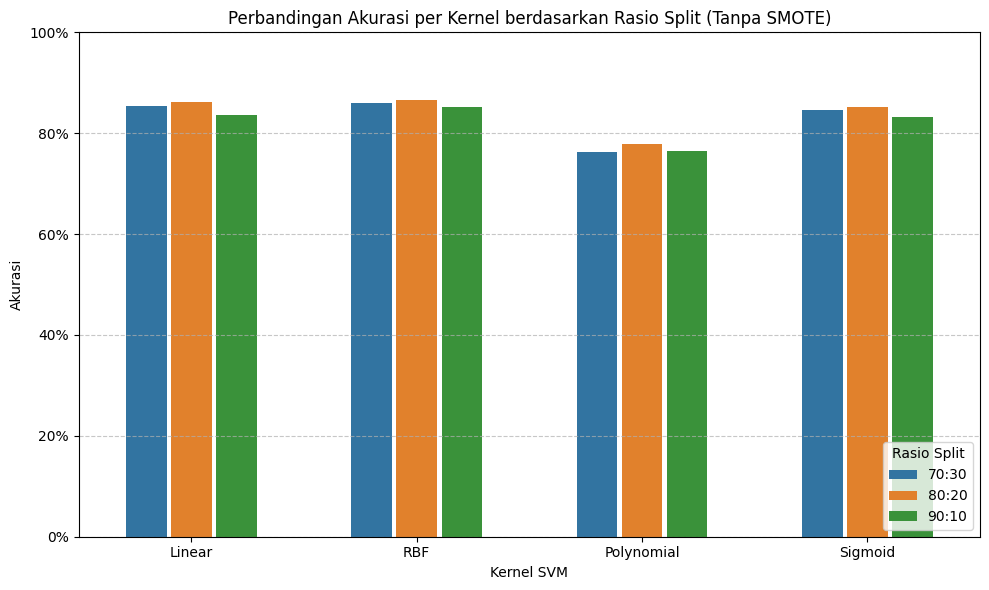

In [ ]:
# Visualisasi untuk data tanpa SMOTE
plot_accuracy_by_kernel(perbandingan_svm, 'Tanpa SMOTE')

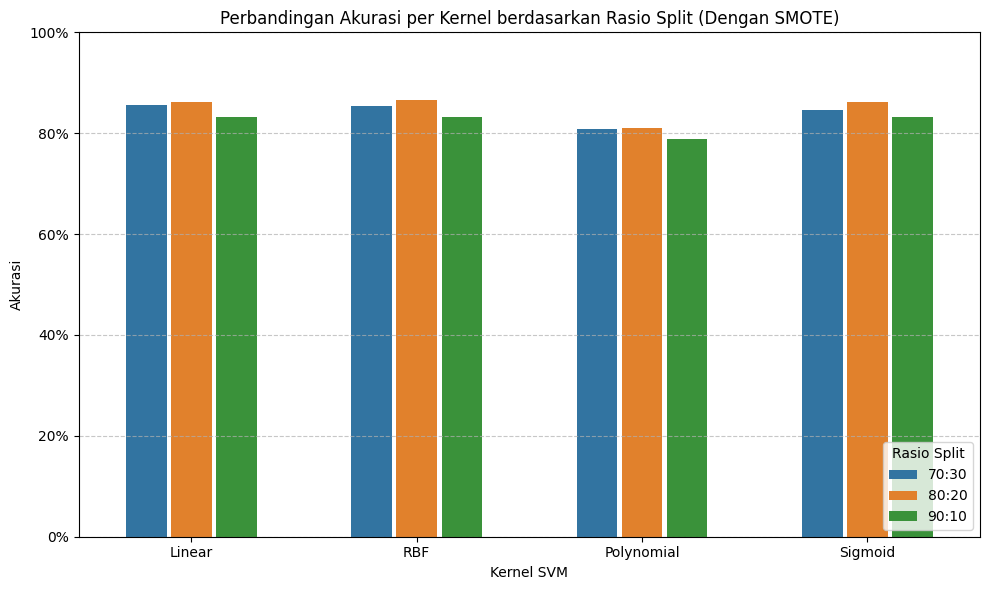

In [ ]:
# Visualisasi untuk data dengan SMOTE
plot_accuracy_by_kernel(perbandingan_svm, 'Dengan SMOTE')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker

def plot_accuracy_comparison(data: pd.DataFrame, split_ratio: str):
    """
    Visualisasi perbandingan akurasi model SVM berdasarkan kernel dan status SMOTE untuk rasio split tertentu.

    Parameters:
    - data: pd.DataFrame, data hasil evaluasi model dengan kolom ['Kernel', 'Rasio Split', 'SMOTE', 'Akurasi', ...]
    - split_ratio: str, rasio split data yang ingin divisualisasikan, misal "80:20"
    """
    # Filter data sesuai rasio split yang dipilih
    df_filtered = data[data['Rasio Split'] == split_ratio]

    # Pivot data untuk membuat kolom SMOTE menjadi kategori
    pivot_df = df_filtered.pivot(index='Kernel', columns='SMOTE', values='Akurasi').reset_index()

    # Plot grouped bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(
    data=pivot_df.melt(id_vars='Kernel', value_vars=['Tanpa SMOTE', 'Dengan SMOTE']),
    x='Kernel', y='value', hue='SMOTE',
    width=0.6, gap=0.1)

    plt.title(f'Perbandingan Akurasi per Kernel (Rasio Split {split_ratio})')
    plt.ylabel('Akurasi')
    plt.ylim(0, 1)
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))  # Format y-axis sebagai persentase
    plt.xlabel('Kernel SVM')
    plt.legend(title='Status SMOTE', loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


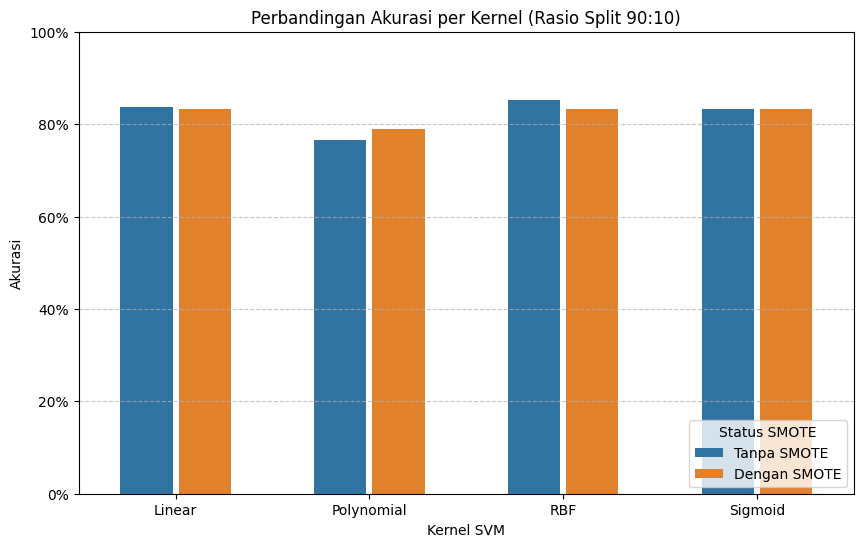

In [ ]:
plot_accuracy_comparison(perbandingan_svm_sorted, "90:10")

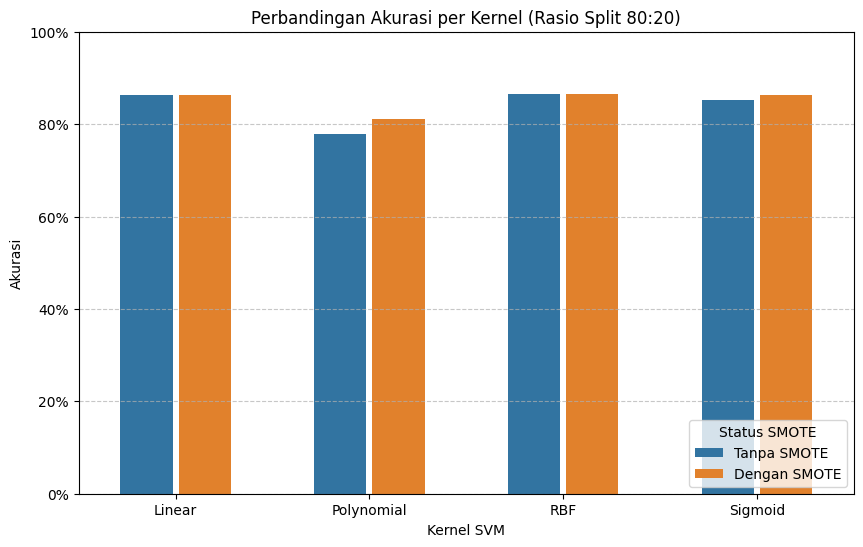

In [ ]:
plot_accuracy_comparison(perbandingan_svm_sorted, "80:20")

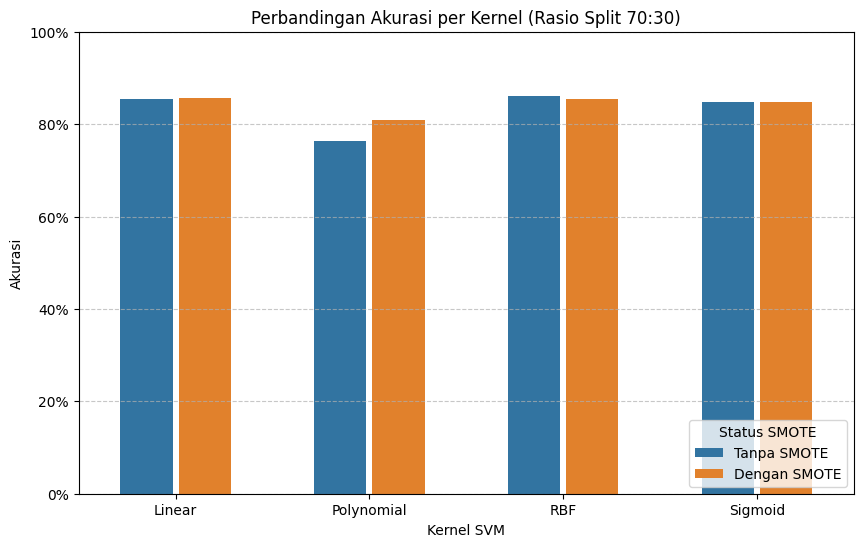

In [ ]:
plot_accuracy_comparison(perbandingan_svm_sorted, "70:30")


##<b>6.3 Hyperparameter Tuning</b>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Buat model dasar dengan kernel RBF
tune_svm_rbf = SVC(kernel='rbf', probability=True)

# Definisikan parameter grid
param_grid = {
    'C': [0.1, 0.5, 1.0, 1.5, 2, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1],
}


# Lakukan GridSearchCV
grid_search = GridSearchCV(tune_svm_rbf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train_smote_80, y_train_smote_80)

# Tampilkan hasil
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Cross-validation Accuracy):", grid_search.best_score_)

# Model terbaik
svm_rbf_best = grid_search.best_estimator_


Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best Parameters: {'C': 1.5, 'gamma': 'scale'}
Best Score (Cross-validation Accuracy): 0.8557347670250897


Berdasarkan hasil grid search, parameter terbaik untuk model SVM dengan kernel RBF adalah **C = 1.5**, dan **gamma = 'scale'**. Dengan kombinasi parameter ini, model mencapai **akurasi 85.57%** pada data latih yang digunakan untuk cross-validation.

In [ ]:
# Buat DataFrame dari hasil grid search
results = pd.DataFrame(grid_search.cv_results_)

# Tampilkan hanya kolom parameter dan mean_test_score
display(results[['param_C', 'param_gamma', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False))

,param_C,param_gamma,mean_test_score
15,1.5,scale,0.855735
19,1.5,1,0.855735
18,1.5,0.5,0.854839
23,2.0,0.5,0.854391
29,10.0,1,0.854391
20,2.0,scale,0.853047
24,2.0,1,0.853047
34,100.0,1,0.853047
28,10.0,0.5,0.853047
25,10.0,scale,0.853047


##<b>6.4 Evaluasi Model</b>


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : RBF (Tuned)
Rasio Split Data: 80:20


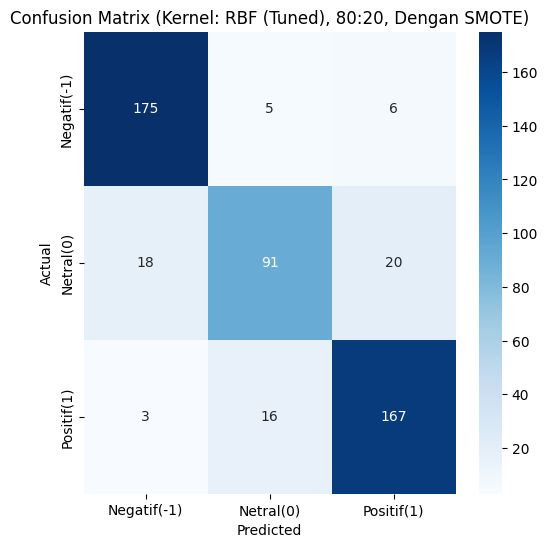


Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.94      0.92       186
           0       0.81      0.71      0.76       129
           1       0.87      0.90      0.88       186

    accuracy                           0.86       501
   macro avg       0.86      0.85      0.85       501
weighted avg       0.86      0.86      0.86       501



In [ ]:
tuned_svm_rbf_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_rbf_best, kernel_type="RBF (Tuned)", with_smote=True, split_ratio="80:20")


=== Evaluasi Model SVM (Dengan SMOTE) ===
Kernel       : RBF
Rasio Split Data: 80:20


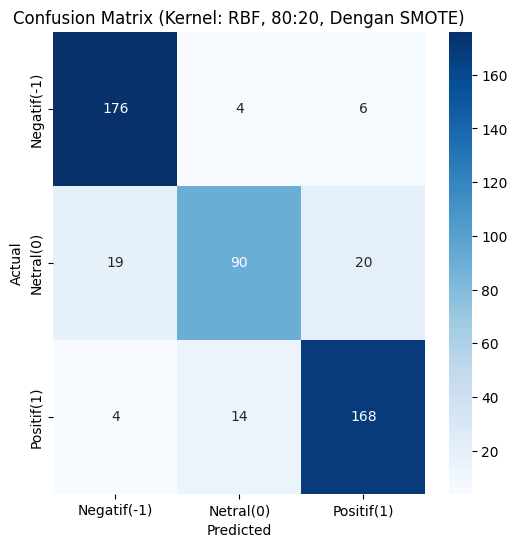


Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.95      0.91       186
           0       0.83      0.70      0.76       129
           1       0.87      0.90      0.88       186

    accuracy                           0.87       501
   macro avg       0.86      0.85      0.85       501
weighted avg       0.86      0.87      0.86       501



In [ ]:
svm_rbf_score = get_model_performance(x_test_tfidf_20, y_test_20, svm_smote_80_rbf, kernel_type="RBF", with_smote=True, split_ratio="80:20")

In [ ]:
# Membuat DataFrame perbandingan skor
perbandingan_svm_rbf = pd.DataFrame({
    'Kernel': ['RBF', 'RBF (Tuned)'],
    'Akurasi': [svm_rbf_score[2], tuned_svm_rbf_score[2]],
    'Presisi': [svm_rbf_score[3], tuned_svm_rbf_score[3]],
    'Recall': [svm_rbf_score[4], tuned_svm_rbf_score[4]],
    'F1-Score': [svm_rbf_score[5], tuned_svm_rbf_score[5]]
})

# Mengurutkan DataFrame berdasarkan Akurasi dari yang tertinggi
peringkat_svm_rbf = perbandingan_svm_rbf.sort_values(by='Akurasi', ascending=False).reset_index(drop=True)

# Menambahkan kolom 'Peringkat'
peringkat_svm_rbf.index += 1
peringkat_svm_rbf.index.name = 'Peringkat'

peringkat_svm_rbf


,Kernel,Akurasi,Presisi,Recall,F1-Score
Peringkat,,,,,
1,RBF,0.866267,0.864421,0.866267,0.863263
2,RBF (Tuned),0.864271,0.861930,0.864271,0.861783


Berdasarkan tabel di atas, dapat dilihat bahwa performa model **SVM dengan kernel RBF (default)** berada di **peringkat pertama**, mengungguli model **SVM RBF hasil tuning hyperparameter** berdasarkan hasil pengujian terhadap data uji.

Secara rinci:
- **Akurasi** model default mencapai **86.63%**, lebih tinggi dibandingkan model tuning sebesar **86.43%**.
- **Presisi** model default adalah **86.44%**, mengungguli model tuning yang mencatatkan **86.19%**.
- **Recall** model default juga lebih baik, yaitu **86.63%** dibandingkan **86.43%** dari model tuning.
- **F1-Score** model default sebesar **86.33%**, sedikit lebih tinggi daripada model tuning yang memperoleh **86.18%**.

Seluruh metrik menunjukkan penurunan pada model hasil tuning, yang mengindikasikan bahwa proses tuning justru **tidak meningkatkan performa**, bahkan berpotensi menyebabkan **overfitting** terhadap data latih.

Penjelasan kemungkinan fenomena ini:
- **Tuning hyperparameter** menggunakan data latih dan validasi (misalnya melalui cross-validation) membuat model terlalu fokus pada pola di data latih.
- Akibatnya, model kehilangan kemampuan **generalisasi**, dan ketika diuji pada data baru, performanya **menurun**.
- Sebaliknya, model default lebih sederhana dan **robust** terhadap variasi data baru.

**Kesimpulan**: Dalam kasus ini, **SVM RBF dengan parameter default lebih unggul** dibandingkan dengan versi tuning, baik dari sisi akurasi, presisi, recall, maupun f1-score.


***

#<b>8. Menyimpan Model</b>

In [ ]:
import pickle

# Menyimpan model SVM
with open('saved_svm_model.pkl', 'wb') as f:
    pickle.dump(svm_smote_80_rbf, f)

# Menyimpan TF-IDF Vectorizer
with open('saved_tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer_80, f)

***

#<b>7. Pengujian Model</b>

In [ ]:
# Contoh tweet untuk menguji model sentimen
tweet_1 = "Pelaksanaan PON 2024 di Jawa Timur sangat luar biasa! Venue-venue yang digunakan sangat memukau. #PON2024 #PONJatim"
tweet_2 = "Sayang sekali, beberapa pertandingan di PON 2024 kurang berjalan lancar, banyak keterlambatan. #PON2024 #eSports"
tweet_3 = "Semoga PON 2024 bisa jadi event olahraga terbaik dan menginspirasi generasi muda di Indonesia! #PON2024 #BanggaIndonesia"
tweet_4 = "Pelaksanaan PON 2024 dijadwalkan berlangsung di Aceh dan Sumatera Utara dengan berbagai cabang olahraga."

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Dictionary normalisasi
normalization_dict = {
    "aja": "saja", "aj": "saja", "bbrp": "beberapa", "bgt": "banget",
    "bgtu": "begitu", "bikin": "membuat", "bkin": "bikin", "blm": "belum",
    "brp": "berapa", "bs": "bisa", "btw": "omong-omong", "dgn": "dengan",
    "dlm": "dalam", "dpt": "dapat", "dr": "dari", "dah": "sudah", "emang": "memang",
    "ga": "tidak", "gak": "tidak", "gk": "tidak", "kalo": "kalau",
    "klu": "kalau", "klo": "kalau", "km": "kamu", "kmrn": "kemarin",
    "krn": "karena", "liat": "lihat", "lg": "lagi", "lho": "loh",
    "makasih": "terima kasih", "mksh": "terima kasih", "nah": "",
    "ngga": "tidak", "nggak": "tidak", "nih": "ini", "ny": "nya",
    "ok": "oke", "oke": "oke", "okey": "oke", "org": "orang",
    "pdhl": "padahal", "pls": "tolong", "sampe": "sampai",
    "sdh": "sudah", "sih": "", "sm": "sama", "smua": "semua",
    "sy": "saya", "td": "tadi", "tdk": "tidak", "thx": "terima kasih",
    "tp": "tapi", "trs": "terus", "udh": "sudah", "udah": "sudah",
    "utk": "untuk", "y": "ya", "yaampun": "ya ampun", "yg": "yang",
}

# Custom stopwords
custom_stopwords = set([
    "dan", "atau", "tetapi", "serta", "lalu", "kemudian", "namun", "sehingga", "agar",
    "di", "ke", "dari", "pada", "dengan", "tanpa", "untuk", "bagi", "dalam", "antara",
    "itu", "ini", "sebuah", "seorang", "para", "sang",
    "yang", "apa", "siapa", "mana",
    "lah", "kah", "pun", "dong", "deh", "loh", "kok", "ya", "nah", "hmm", "oh", "eh",
    "sekarang", "kemarin", "besok", "nanti",
    "saja", "hanya", "bahkan"
])

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def text_preparation(text):
    """
    Melakukan pembersihan teks lengkap: cleaning, case folding, normalisasi, tokenisasi,
    penghapusan stopword, stemming, dan penghapusan kata satu huruf.

    Parameters:
    text (str): Teks mentah yang akan diproses.

    Returns:
    str: Teks yang sudah diproses sepenuhnya.
    """

    # 1. Cleaning
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)  # Hapus URL
    text = re.sub(r'&[a-zA-Z0-9#]+;', ' ', text)        # Hapus entitas HTML
    text = re.sub(r'<[^>]+>', ' ', text)                # Hapus tag HTML
    text = re.sub(r'(?<=\w)\.(?=\w)', ' ', text)         # Tambah spasi di antara huruf dan titik
    text = text.replace('\xa0', ' ')                    # Ganti non-breaking space
    emoji_pattern = re.compile(
        "[" u"\U0001F1E0-\U0001F1FF" u"\U0001F300-\U0001F5FF"
        u"\U0001F600-\U0001F64F" u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F" u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF" u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F" u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0" "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(' ', text)                 # Hapus emoji
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)          # Hapus mention
    text = re.sub(r'#\w+', ' ', text)                    # Hapus hashtag
    text = re.sub(r'^RT[\s]+', '', text)                 # Hapus RT
    text = re.sub(r'[0-9]', ' ', text)                   # Hapus angka
    text = re.sub(r'[^A-Za-z ]', ' ', text)              # Hapus karakter non-alfabet
    text = re.sub(r'[\n\r]', ' ', text)                  # Hapus newline
    text = re.sub(r'\s+', ' ', text).strip()             # Normalisasi spasi

    # 2. Case folding
    text = text.lower()

    # 3. Normalisasi singkatan
    for key, value in normalization_dict.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)
    text = re.sub(r'\s+', ' ', text).strip()

    # 4. Tokenisasi
    tokens = text.split()

    # 5. Stopword removal
    tokens = [word for word in tokens if word not in custom_stopwords]

    # 6. Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # 7. Hapus kata satu huruf
    tokens = [word for word in tokens if len(word) > 1]

    # Gabungkan kembali menjadi string
    final_text = ' '.join(tokens)

    return final_text


In [ ]:
import pickle
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

# Memuat model SVM dan TF-IDF yang sudah disimpan
try:
    with open('saved_svm_model.pkl', 'rb') as model_file:
        loaded_svm_model = pickle.load(model_file)
    check_is_fitted(loaded_svm_model)

    with open('saved_tfidf_vectorizer.pkl', 'rb') as tfidf_file:
        loaded_tfidf_vectorizer = pickle.load(tfidf_file)
    check_is_fitted(loaded_tfidf_vectorizer)

    print("Model dan TF-IDF vectorizer berhasil dimuat dan telah dilatih.")
except FileNotFoundError as e:
    print(f"File tidak ditemukan: {e}")
except NotFittedError as e:
    print(f"Model atau vectorizer belum dilatih: {e}")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat model: {e}")

Model dan TF-IDF vectorizer berhasil dimuat dan telah dilatih.


In [ ]:
tweets = [tweet_1, tweet_2, tweet_3, tweet_4]

for i, tweet in enumerate(tweets):
    # Preprocessing dan transformasi tweet menggunakan TF-IDF
    tweets_prep = text_preparation(tweet)
    tweets_tfidf = loaded_tfidf_vectorizer.transform([tweets_prep])

    # Prediksi sentimen menggunakan model SVM
    predictions = loaded_svm_model.predict(tweets_tfidf)
    probas = loaded_svm_model.predict_proba(tweets_tfidf)

    # Menentukan kelas sentimen
    predicted_label = predictions[0]
    sentiment = 'Positif' if predicted_label == 1 else 'Negatif' if predicted_label == -1 else 'Netral'

    # Ambil probabilitas untuk kelas yang diprediksi
    prob_pos = round(probas[0][2] * 100, 2) if predicted_label == 1 else 0.0
    prob_neg = round(probas[0][0] * 100, 2) if predicted_label == -1 else 0.0
    prob_neutral = round(probas[0][1] * 100, 2) if predicted_label == 0 else 0.0

    # Tampilkan tweet dan hasil prediksi beserta probabilitas
    print(f"Post: {tweet}")
    print(f"Prediksi Sentimen: {sentiment}")
    print(f"Probabilitas Positif: {prob_pos}%")
    print(f"Probabilitas Negatif: {prob_neg}%")
    print(f"Probabilitas Netral: {prob_neutral}%")
    print("-" * 50)


Post: Pelaksanaan PON 2024 di Jawa Timur sangat luar biasa! Venue-venue yang digunakan sangat memukau. #PON2024 #PONJatim
Prediksi Sentimen: Positif
Probabilitas Positif: 93.07%
Probabilitas Negatif: 0.0%
Probabilitas Netral: 0.0%
--------------------------------------------------
Post: Sayang sekali, beberapa pertandingan di PON 2024 kurang berjalan lancar, banyak keterlambatan. #PON2024 #eSports
Prediksi Sentimen: Negatif
Probabilitas Positif: 0.0%
Probabilitas Negatif: 84.21%
Probabilitas Netral: 0.0%
--------------------------------------------------
Post: Semoga PON 2024 bisa jadi event olahraga terbaik dan menginspirasi generasi muda di Indonesia! #PON2024 #BanggaIndonesia
Prediksi Sentimen: Positif
Probabilitas Positif: 97.15%
Probabilitas Negatif: 0.0%
Probabilitas Netral: 0.0%
--------------------------------------------------
Post: Pelaksanaan PON 2024 dijadwalkan berlangsung di Aceh dan Sumatera Utara dengan berbagai cabang olahraga.
Prediksi Sentimen: Netral
Probabilitas Po

***

#<b>9. Visualisasi Data Sentimen</b>

In [ ]:
df_analisis = df_txt.copy()

# Pemetaan label ke nama sentimen
label_mapping = {1: 'Positif', 0: 'Netral', -1: 'Negatif'}
df_analisis['Sentimen'] = df_analisis['Label'].map(label_mapping)
df_analisis.head()

,username,full_text,Label,cleaned_text,casefolding_text,norm_text,token_text,swremove_text,stem_text,Sentimen
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,"[keindahan, venue, pon, membuat, setiap, perta...","[keindahan, venue, pon, membuat, pertandingan,...",indah venue pon buat tanding asa lebih magis,Positif
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,"[pon, bakal, jadi, event, yang, paling, dinant...","[pon, bakal, jadi, event, paling, dinantikan, ...",pon bakal jadi event paling nanti venue sudah ...,Positif
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...,"[pertandingan, demi, pertandingan, di, esport,...","[pertandingan, pertandingan, esport, pon, aceh...",tanding tanding esport pon aceh sumut prediksi...,Netral
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,"[jatim, meraih, medali, emas, pada, seluruh, n...","[jatim, meraih, medali, emas, seluruh, nomor, ...",jatim raih medali emas seluruh nomor cabang te...,Netral
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,"[yah, sayang, banget, ya, saaih, halilintar, g...","[yah, sayang, banget, saaih, halilintar, gagal...",yah sayang banget saaih halilintar gagal tampi...,Negatif


##<b>9.1 Distribusi Sentimen</b>

In [ ]:
import plotly.express as px

# Warna untuk masing-masing kelas sentimen
custom_colors = {'Negatif': '#FF5959', 'Netral': '#FACF5A', 'Positif': '#4F9DA6'}

def plot_sentiment_pie_chart(df, custom_colors=custom_colors):
    """
    Menampilkan pie chart distribusi sentimen dari DataFrame.

    Parameter:
    - df (pd.DataFrame): DataFrame yang sudah memiliki kolom 'Sentimen' dengan nilai 'Positif', 'Netral', atau 'Negatif'.
    - custom_colors (dict): Dictionary yang memetakan nama sentimen ke kode warna hex.

    Return:
    - pd.DataFrame: DataFrame berisi jumlah masing-masing kategori sentimen.
    """
    # Hitung jumlah per sentimen
    sentimen_counts = df['Sentimen'].value_counts().reset_index()
    sentimen_counts.columns = ['Sentimen', 'Jumlah']

    # Plot pie chart
    fig = px.pie(
        sentimen_counts,
        names='Sentimen',
        values='Jumlah',
        title='Distribusi Sentimen',
        color='Sentimen',
        color_discrete_map=custom_colors,
        hole=0.5
    )

    fig.update_traces(textinfo='percent+label')
    fig.show()

    return sentimen_counts


sentimen_dist = plot_sentiment_pie_chart(df_analisis)
print(sentimen_dist)


  Sentimen  Jumlah
0  Negatif     930
1  Positif     928
2   Netral     645


<h2> 📊 Distribusi Sentimen

Berdasarkan hasil analisis terhadap **2.503 tweet** yang terkait dengan pelaksanaan **PON 2024**, berikut adalah distribusi sentimen yang ditemukan:

| Sentimen | Jumlah | Persentase |
|----------|--------|------------|
| **Negatif**  | 930    | 38.8%      |
| **Positif**  | 928    | 37.1%      |
| **Netral**   | 645    | 24.1%      |

Dari data tersebut, kita dapat melihat bahwa **sentimen negatif** dan **positif** hampir seimbang, dengan **930 tweet negatif** (38.8%) dan **928 tweet positif** (37.1%). Sementara itu, **645 tweet netral** (24.1%) menunjukkan bahwa sebagian kecil publik cenderung tidak memiliki pendapat yang kuat atau hanya memberikan informasi terkait pelaksanaan PON tanpa memberikan penilaian positif atau negatif yang jelas.

---

<h2> 🧠 Interpretasi Data Sentimen

1. **Polarisasi Opini Publik**
   - Salah satu hal yang paling mencolok dalam distribusi sentimen ini adalah **ketidakseimbangan yang relatif tipis antara tweet negatif dan positif**. Dengan hampir **38.8% tweet negatif** dan **37.1% tweet positif**, ini menunjukkan bahwa **pendapat masyarakat sangat terpolarisasi** mengenai pelaksanaan PON 2024. Artinya, sebagian besar peserta atau penonton memiliki pandangan yang jelas dan kuat terhadap acara ini, tetapi pandangan tersebut berbeda secara signifikan, baik dalam hal kritik maupun pujian.
   
   - Polarisasi semacam ini sering kali mencerminkan adanya isu-isu **kontroversial** yang menonjol selama acara, seperti masalah infrastruktur, logistik, kualitas venue, atau bahkan performa atlet. Pengalaman masyarakat bisa sangat bervariasi tergantung pada lokasi, fasilitas, atau masalah pribadi yang mereka hadapi saat mengikuti PON.

2. **Sentimen Netral yang Relatif Lebih Rendah**
   - Meskipun terdapat cukup banyak tweet dengan sentimen netral (**24.1%**), jumlahnya masih lebih sedikit dibandingkan tweet dengan sentimen positif atau negatif. Ini menunjukkan bahwa **sebagian besar warganet tidak hanya menyampaikan informasi netral**, tetapi lebih memilih untuk mengekspresikan **opini yang jelas dan langsung**, baik itu positif atau negatif.
   
   - **Sentimen netral** sering kali mencakup tweet yang hanya memberikan fakta tanpa mengandung opini atau pandangan pribadi yang mendalam. Jika kita lebih mendalami tweet dengan sentimen netral, kita mungkin akan menemukan bahwa banyak yang sekadar menginformasikan tentang jadwal pertandingan atau hasil tanpa memberi komentar lebih lanjut. Hal ini memberikan kita kesempatan untuk menggali lebih dalam mengenai **sentimen sesungguhnya** dari publik, terutama dengan menganalisis lebih lanjut kata-kata yang digunakan dalam tweet positif dan negatif.

3. **Strategi Komunikasi yang Diperlukan**
   - Mengingat hampir setengah dari tweet memiliki sentimen **negatif atau positif**, ini menandakan adanya **perbedaan persepsi yang signifikan** di antara masyarakat mengenai pelaksanaan PON 2024. Oleh karena itu, penting bagi pihak penyelenggara untuk tidak hanya fokus pada aspek teknis atau administratif PON, tetapi juga pada **komunikasi dan citra publik**.
   
   - **Sentimen negatif** yang cukup tinggi (38.8%) harus menjadi perhatian utama. Sentimen negatif ini dapat mencerminkan **masalah yang cukup besar**, baik itu terkait dengan keluhan dari peserta, pengunjung, atau bahkan masyarakat umum. Pihak penyelenggara harus menanggapi hal ini secara cepat dengan **transparansi** dan **responsif terhadap kritik** yang ada. Hal ini bisa melibatkan perbaikan terhadap kualitas layanan, fasilitas, serta cara penyelesaian masalah di lapangan.

   - Di sisi lain, **sentimen positif** yang juga hampir setara (37.1%) menunjukkan bahwa banyak orang yang **mengapresiasi pelaksanaan PON**, baik itu dalam hal penyelenggaraan maupun pencapaian atlet. Untuk memanfaatkan ini, komunikasi yang lebih luas dan proaktif mengenai **prestasi atlet**, **kesuksesan logistik**, dan dampak positif PON terhadap masyarakat atau ekonomi dapat memperkuat persepsi positif.

---

<h2>📌 Kesimpulan

Berdasarkan analisis terhadap **2.503 tweet** tentang pelaksanaan PON 2024, kita dapat menarik kesimpulan bahwa **pendapat masyarakat sangat terpolarisasi** antara **positif dan negatif**, dengan proporsi yang hampir seimbang. Hanya sekitar **24.1% dari tweet yang bersifat netral**, menunjukkan bahwa sebagian besar warganet memiliki pendapat yang jelas dan kuat mengenai acara ini. **Sentimen negatif yang lebih tinggi** menunjukkan adanya area yang perlu perhatian dan perbaikan dari penyelenggara, sementara **sentimen positif** menunjukkan bahwa PON 2024 juga membawa dampak positif yang signifikan bagi sebagian besar peserta dan masyarakat. Diperlukan pendekatan komunikasi yang bijak dan responsif untuk **menanggapi keluhan dan memperkuat narasi positif**, guna memastikan keberlanjutan dan kesuksesan acara di masa mendatang.


##<b>9.2 Wordcloud pada Masing-Masing Sentimen</b>

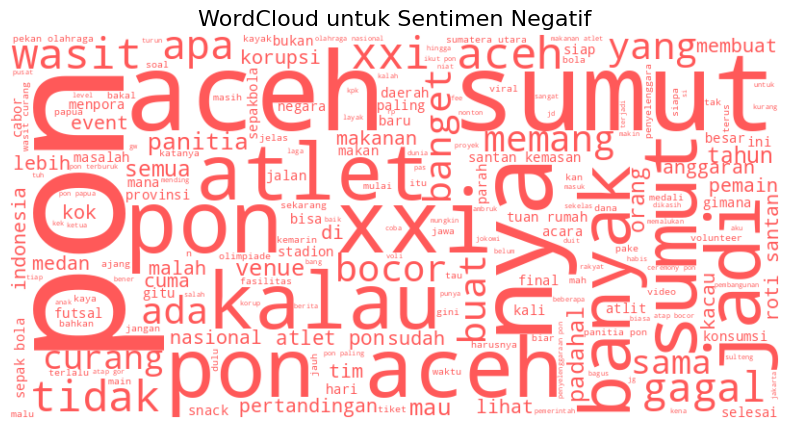

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Warna untuk masing-masing kelas sentimen
custom_colors = {'Negatif': '#FF5959', 'Netral': '#FACF5A', 'Positif': '#4F9DA6'}

def plot_sentiment_wordcloud(df, label_sentimen, column='swremove_text', custom_colors=custom_colors):
    """
    Membuat dan menampilkan wordcloud untuk tweet berdasarkan label sentimen tertentu
    dengan warna kustom dan menggabungkan token menjadi string.

    Parameters:
    - df: DataFrame yang berisi tweet dan label sentimen
    - label_sentimen: Label sentimen yang ingin dianalisis ('Negatif', 'Positif', 'Netral')
    - column: Nama kolom yang berisi token teks tweet (default 'swremove_text')
    - custom_colors: Warna khusus untuk tiap label sentimen

    Returns:
    - None (menampilkan WordCloud)
    """
    # Filter tweet berdasarkan label sentimen yang dipilih
    filtered_df = df[df['Sentimen'] == label_sentimen]

    # Pastikan kolom berupa list of tokens, lalu gabungkan setiap token menjadi satu string per baris
    joined_texts = filtered_df[column].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else str(tokens))

    # Gabungkan semua baris menjadi satu string besar
    text = ' '.join(joined_texts)

    # Buat WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        contour_color='black',
        contour_width=1
    ).generate(text)

    # Pewarnaan sesuai label
    wordcloud.recolor(color_func=lambda *args, **kwargs: custom_colors[label_sentimen])

    # Tampilkan
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Sentimen {label_sentimen}', fontsize=16)
    plt.show()

# Pemanggilan fungsi untuk membuat WordCloud untuk sentimen negatif
plot_sentiment_wordcloud(df_analisis, 'Negatif', column='swremove_text', custom_colors=custom_colors)

<h2> 📌 Interpretasi WordCloud Sentimen Negatif PON 2024

1. **Kritik Terhadap Tuan Rumah (Aceh & Sumut)**
  - Kata-kata seperti **"aceh"** dan **"sumut"** mendominasi WordCloud dan menjadi pusat sentimen negatif. Ini menunjukkan bahwa masyarakat atau peserta banyak mengaitkan berbagai keluhan dan masalah dengan **dua provinsi penyelenggara** tersebut. Sorotan negatif ini bisa disebabkan oleh kualitas fasilitas, kesiapan infrastruktur, atau pengelolaan event yang tidak memenuhi ekspektasi.

2. **Masalah Penyelenggaraan dan Manajemen Acara**
    - Kata-kata seperti **"panitia"**, **"venue"**, **"anggaran"**, dan **"jadi"** mengindikasikan adanya persepsi negatif terhadap **pengelolaan teknis dan administratif acara**. Banyak pihak tampaknya mempertanyakan kesiapan dan kapabilitas panitia dalam menyelenggarakan PON 2024. Keluhan ini juga mencakup masalah teknis seperti lokasi pertandingan, fasilitas umum, serta keputusan-keputusan strategis yang dianggap tidak efektif atau tidak adil.

3. **Keadilan dan Integritas dalam Pertandingan**
    - Kata **"wasit"**, **"curang"**, dan **"gagal"** mencerminkan kekhawatiran terhadap **integritas kompetisi**. Munculnya kata-kata ini menandakan adanya persepsi bahwa pertandingan tidak berjalan dengan adil atau profesional. Ketidakpercayaan terhadap keputusan wasit atau dugaan adanya kecurangan dapat mencoreng reputasi acara dan memengaruhi semangat sportivitas antar peserta.

4. **Kekecewaan Terhadap Logistik dan Pelayanan**
  - Keluhan terkait logistik dan konsumsi juga muncul kuat, terlihat dari kata seperti **"makanan"**, **"snack"**, dan **"kemasan"**. Ini menunjukkan adanya **ketidakpuasan terhadap kualitas konsumsi atau fasilitas pendukung lainnya**, baik dari peserta, relawan, atau penonton. Ini adalah aspek penting dalam event olahraga besar dan bisa sangat memengaruhi citra tuan rumah.

5. **Sentimen Emosional yang Tinggi**
  - Kata-kata seperti **"tidak"**, **"kacau"**, **"parah"**, **"cuma"**, dan **"banget"** merupakan ekspresi yang mencerminkan **tingkat frustrasi dan emosi negatif publik**. Ini mengindikasikan bahwa bukan hanya terjadi masalah teknis, namun ekspektasi masyarakat terhadap PON 2024 jauh dari kenyataan. Sentimen ini bisa datang dari atlet, media, atau masyarakat umum yang menilai PON tidak berjalan sesuai harapan.

---

<h2> 📈 Kesimpulan dan Insight Penting

Dari WordCloud ini, terlihat jelas bahwa PON 2024 menghadapi **tantangan besar dalam hal persepsi publik, kualitas penyelenggaraan, dan integritas acara**. Kritikan diarahkan tidak hanya kepada lokasi dan fasilitas, tetapi juga terhadap profesionalisme wasit dan keadilan pertandingan. Ada pula keluhan terhadap layanan dasar seperti makanan dan logistik.

Sentimen negatif ini bisa berdampak jangka panjang terhadap **kepercayaan publik, partisipasi atlet di masa depan, dan reputasi daerah penyelenggara**. Oleh karena itu, penting bagi pihak penyelenggara untuk **menindaklanjuti feedback negatif ini secara terbuka dan terstruktur**, termasuk dengan melakukan audit, perbaikan fasilitas, dan transparansi publik.


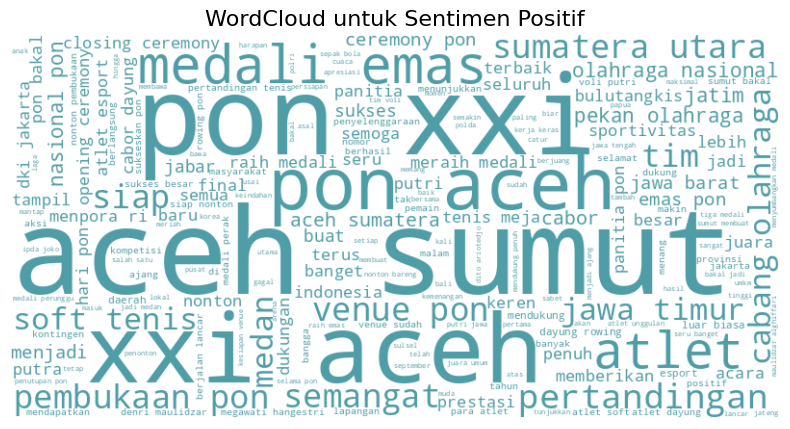

In [ ]:
# Pemanggilan fungsi untuk membuat WordCloud untuk sentimen positif
plot_sentiment_wordcloud(df_analisis, 'Positif', column='swremove_text', custom_colors=custom_colors)

<h2>📌 Interpretasi WordCloud Sentimen Positif PON 2024

1. **Antusiasme terhadap Lokasi Penyelenggaraan (Aceh & Sumut)**
  - Kata-kata "aceh" dan "sumut" kembali menjadi dominan, namun kali ini dalam konteks positif. Hal ini menunjukkan adanya kebanggaan atau harapan positif terhadap peran kedua provinsi tersebut sebagai tuan rumah. Masyarakat tampaknya antusias dengan penyelenggaraan PON di luar Jawa, dan menyambut baik keunikan serta potensi dari wilayah tersebut.

2. **Semangat Kompetisi dan Dukungan untuk Atlet**
  - Kata-kata seperti "atlet", "semangat", "emas", dan "medali" menunjukkan bahwa sentimen positif banyak diarahkan pada dukungan terhadap para atlet dan semangat kompetisi olahraga. Publik tampaknya fokus pada hasil pertandingan, perjuangan atlet, serta kebanggaan atas perolehan medali. Ini mencerminkan tingginya apresiasi masyarakat terhadap prestasi dan perjuangan para kontingen.

3. **Apresiasi terhadap Acara dan Persiapan**
 - Kemunculan kata "venue", "pembukaan", "siap", dan "ceremony" menandakan bahwa ada respon positif terhadap persiapan dan pelaksanaan acara, khususnya acara seremonial seperti opening dan closing ceremony. Ini mencerminkan bahwa upaya panitia dalam membangun atmosfer PON mendapat sambutan baik dari publik.

4. **Fokus pada Cabang Olahraga dan Kompetisi**
  - Kata "pertandingan", "cabor", "final", serta penyebutan cabang seperti "soft tenis", "bulu tangkis", "dayung", dan "esport" menunjukkan bahwa masyarakat menaruh minat besar pada pertandingan antar cabang olahraga. Antusiasme ini penting untuk menjaga semangat nasionalisme dan memperluas perhatian pada berbagai jenis olahraga, tidak hanya cabang populer.

5. **Nuansa Optimisme dan Nasionalisme**
  - Munculnya kata seperti "nasional", "indonesia", dan "sukses" mencerminkan adanya rasa bangga dan optimisme terhadap skala nasional dari acara ini. WordCloud ini menggambarkan PON bukan hanya sebagai ajang kompetisi, tetapi juga sebagai simbol persatuan dan pencapaian bangsa, terutama dalam konteks pemulihan pasca pandemi.

---

<h2>📈 Kesimpulan dan Insight Penting

Berdasarkan WordCloud sentimen positif ini, dapat disimpulkan bahwa masyarakat secara umum mendukung dan antusias terhadap pelaksanaan PON 2024. Dukungan ini ditunjukkan melalui apresiasi terhadap perjuangan atlet, penyelenggaraan acara, dan kebanggaan terhadap daerah tuan rumah.

Publik juga menunjukkan optimisme dan semangat nasionalisme, yang merupakan modal sosial penting untuk memperkuat solidaritas antar wilayah. Tingginya perhatian terhadap berbagai cabang olahraga menunjukkan bahwa event ini berhasil menarik partisipasi emosional masyarakat secara luas.


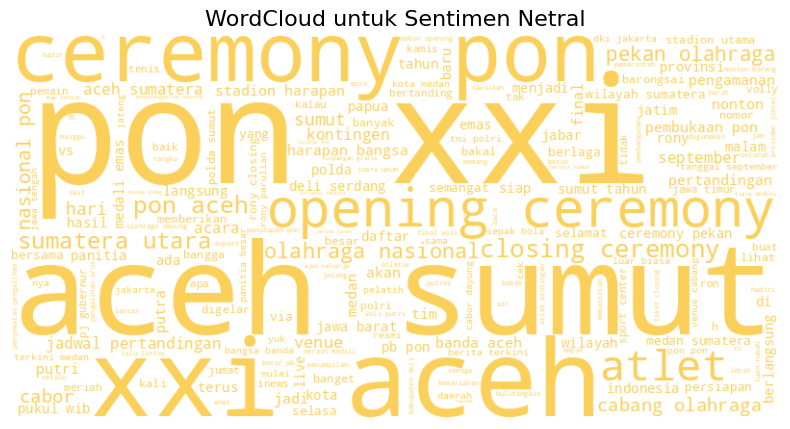

In [ ]:
# Pemanggilan fungsi untuk membuat WordCloud untuk sentimen netral
plot_sentiment_wordcloud(df_analisis, 'Netral', column='swremove_text', custom_colors=custom_colors)

<h2>📌 Interpretasi WordCloud Sentimen Netral PON 2024

1. **Fokus pada Informasi Umum dan Factual**  
  - Dominasi kata-kata seperti "pon", "xxi", "aceh", dan "sumut" mencerminkan penyebutan yang netral terhadap pelaksanaan PON dan lokasinya. Ini menunjukkan bahwa banyak pernyataan publik bersifat informasional, seperti menyampaikan tempat, waktu, atau jadwal acara. Kalimat netral biasanya mencakup pengumuman resmi, berita media, atau pernyataan administratif tanpa ekspresi emosi.

2. **Penekanan pada Upacara Pembukaan dan Penutupan**  
  - Kata seperti "opening", "closing", dan "ceremony" menandakan bahwa upacara pembukaan dan penutupan menjadi pusat pembicaraan, namun dalam konteks deskriptif, bukan pujian atau keluhan. Hal ini menggambarkan bahwa masyarakat atau media memberi perhatian pada momen simbolik, tapi tidak secara eksplisit menyampaikan sentimen tertentu.

3. **Jadwal dan Lokasi Kompetisi**  
  - Kata-kata seperti "jadwal", "pertandingan", "venue", "stadion", dan "hari ini" menunjukkan bahwa banyak sentimen netral berisi informasi seputar agenda pertandingan, lokasi venue, dan penyelenggaraan hari per hari. Ini biasanya muncul dari publikasi berita atau unggahan media sosial yang hanya menginformasikan tanpa opini.

4. **Referensi terhadap Cabang Olahraga dan Kontingen**  
  - Munculnya kata seperti "cabor", "atlet", "kontingen", dan "nasional" menunjukkan fokus pada peserta dan jenis kompetisi, dalam bentuk narasi yang netral, misalnya menyebut siapa yang bertanding, asal daerah, atau urutan main. Ini penting karena mencerminkan bagaimana masyarakat mengikuti perkembangan acara sebagai penonton atau pengamat.

5. **Kehadiran Aparat dan Protokol Keamanan**  
  - Kata seperti "polda", "pengamanan", dan "polri" mencerminkan perhatian terhadap keamanan acara, yang juga disampaikan dalam konteks informatif, seperti kesiapan aparat dalam menjaga jalannya PON. Ini bisa jadi hasil dari laporan media atau komunikasi resmi pemerintah.

<h2>📈 Kesimpulan dan Insight Penting

WordCloud untuk sentimen netral menunjukkan bahwa sebagian besar percakapan atau pemberitaan mengenai PON 2024 bersifat deskriptif dan informasional, tanpa memuat penilaian emosional yang kuat. Publik cenderung menyebarkan informasi terkait lokasi, jadwal, upacara, dan peserta secara netral.

Insight penting yang bisa diambil adalah:
- Sentimen netral mendominasi diskursus publik sebagai bentuk pelaporan atau pemantauan.
- Data ini penting untuk memetakan sebaran informasi dan melihat seberapa besar penyebaran awareness terkait PON 2024 di ruang publik.
- Netralitas juga menunjukkan bahwa masyarakat menunggu dan mengamati tanpa memberikan penilaian terlalu dini—yang bisa berubah ke arah positif atau negatif tergantung pelaksanaan ke depan.


##<b>9.3 Frekuensi Penggunaan Kata pada Masing-Masing Sentimen</b>

In [ ]:
import pandas as pd
import plotly.express as px
from collections import Counter

def plot_ngram_frequencies(df, sentimen_label='Positif', column='swremove_text', n=1, top_n=20):
    """
    Menampilkan grafik frekuensi n-gram dari kolom token, berdasarkan sentimen dan ukuran n-gram.

    Parameters:
    - df: DataFrame yang berisi data
    - sentimen_label: Jenis sentimen yang ingin difilter ('Positif', 'Negatif', 'Netral')
    - column: Nama kolom yang berisi token list (default: 'swremove_text')
    - n: Ukuran n-gram (1 = unigram, 2 = bigram, 3 = trigram)
    - top_n: Jumlah n-gram teratas yang ingin ditampilkan (default: 20)

    Returns:
    - DataFrame frekuensi n-gram
    - Visualisasi bar chart horizontal dengan Plotly
    """
    # Filter berdasarkan sentimen
    filtered_df = df[df['Sentimen'] == sentimen_label]

    # Gabungkan seluruh token dari kolom yang dipilih
    all_tokens = []
    for tokens in filtered_df[column]:
        if isinstance(tokens, list):
            all_tokens.extend(tokens)

    # Buat n-gram
    ngrams = zip(*[all_tokens[i:] for i in range(n)])
    ngram_list = [' '.join(ng) for ng in ngrams]

    # Hitung frekuensi n-gram
    ngram_counts = Counter(ngram_list)
    top_ngrams = ngram_counts.most_common(top_n)

    # Buat DataFrame hasil
    ngram_df = pd.DataFrame(top_ngrams, columns=[f'{n}-gram', 'Frekuensi'])

    # Visualisasi horizontal
    fig = px.bar(
        ngram_df.sort_values('Frekuensi'),
        x='Frekuensi',
        y=f'{n}-gram',
        orientation='h',
        title=f'Frekuensi Top {top_n} {n}-gram untuk Sentimen {sentimen_label}',
        text='Frekuensi',
        color_discrete_sequence=[custom_colors[sentimen_label]]
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(
        height=600,
        yaxis_title='',
        xaxis_title='Frekuensi',
        showlegend=False
    )
    fig.show()

    return ngram_df

In [ ]:
# n-gram untuk sentimen negatif
df_unigram_neg = plot_ngram_frequencies(df_analisis, sentimen_label='Negatif', n=1, top_n=20)
df_bigram_neg = plot_ngram_frequencies(df_analisis, sentimen_label='Negatif', n=2, top_n=20)
df_trigram_neg = plot_ngram_frequencies(df_analisis, sentimen_label='Negatif', n=3, top_n=20)

print(f"Frekuensi Unigram sentimen Negatif:\n{df_unigram_neg}\n")
print(f"Frekuensi Bigram sentimen Negatif:\n{df_bigram_neg}\n")
print(f"Frekuensi Trigram sentimen Negatif:\n{df_trigram_neg}\n")

Frekuensi Unigram sentimen Negatif:
     1-gram  Frekuensi
0       pon        768
1      aceh        265
2     sumut        220
3     atlet        137
4       nya        126
5       xxi        104
6     gagal         99
7     kalau         87
8     wasit         83
9      jadi         79
10    bocor         70
11    venue         69
12   banyak         69
13   santan         68
14    tidak         62
15  panitia         62
16   curang         60
17   banget         57
18      apa         56
19     sama         56

Frekuensi Bigram sentimen Negatif:
               2-gram  Frekuensi
0          aceh sumut        138
1             pon xxi        104
2            pon aceh         99
3            xxi aceh         64
4           atlet pon         37
5         roti santan         28
6      santan kemasan         28
7          tuan rumah         26
8          sepak bola         23
9      pekan olahraga         19
10        panitia pon         17
11     sumatera utara         16
12          pon 

<h2>📌 Interpretasi Frekuensi N-Gram Sentimen Negatif PON 2024

1. Unigram (Kata Tunggal)
  - Kata paling dominan seperti "pon", "aceh", "sumut", "atlet", dan "xxi" mencerminkan fokus umum pada pelaksanaan PON dan lokasi penyelenggara.
  - Kata negatif seperti "gagal", "bocor", "curang", "tidak", dan "panitia" menunjukkan adanya sentimen buruk terkait penyelenggaraan, dugaan kecurangan, serta manajemen teknis acara.
  - Istilah seperti "santan" dan "roti" mengacu pada isu spesifik terkait konsumsi makanan atlet yang viral, menandakan perhatian besar publik terhadap logistik.

2. Bigram (2-Kata)
  - Frasa dominan "aceh sumut", "pon xxi", dan "pon aceh" menekankan persepsi negatif yang diarahkan ke tuan rumah.
  - Bigram seperti "roti santan", "santan kemasan", dan "makanan atlet" memperkuat narasi negatif soal kualitas konsumsi atlet.
  - Kombinasi seperti "wasit curang", "pon gagal", dan "pon terburuk" memperlihatkan adanya tuduhan atau opini negatif terhadap profesionalisme kompetisi.

3. Trigram (3-Kata)
  - Frasa "pon aceh sumut", "pon xxi aceh", dan "xxi aceh sumut" secara konsisten muncul, memperlihatkan keterkaitan sentimen negatif dengan lokasi penyelenggara.
  - Trigram seperti "roti santan kemasan", "berisi roti santan", dan "makanan atlet pon" menegaskan isu makanan sebagai peristiwa penting yang membentuk opini publik.
  - "Gagal raih medali", "wasit curang", dan "pon terburuk" menunjukkan kekecewaan terhadap hasil pertandingan dan integritas pelaksana.

<h2>📈 Kesimpulan dan Insight Penting

- Masalah Logistik Makanan Jadi Sorotan Utama  
  Kata-kata seperti "roti santan kemasan" dan "makanan atlet pon" menunjukkan bahwa isu makanan menjadi simbol kuat dari ketidakpuasan terhadap logistik PON 2024.

- Ketidakpuasan Terhadap Kinerja dan Manajemen  
  Frasa seperti "wasit curang", "pon gagal", dan "pon terburuk" menunjukkan kekecewaan publik terhadap kualitas penyelenggaraan serta integritas kompetisi.

- Fokus Kritik pada Tuan Rumah: Aceh & Sumut  
  Kombinasi lokasi seperti "aceh sumut" dan "pon aceh sumut" menunjukkan bahwa masyarakat mengaitkan ketidakpuasan mereka dengan lokasi penyelenggara, baik secara simbolis maupun praktis.

- Ekspektasi Publik Tidak Terpenuhi  
  Banyaknya kata negatif seperti "gagal", "bocor", "tidak", dan "panitia" mengindikasikan adanya kesenjangan antara harapan publik dan realita pelaksanaan PON 2024.



In [ ]:
# n-gram untuk sentimen positif
df_unigram_pos = plot_ngram_frequencies(df_analisis, sentimen_label='Positif', n=1, top_n=20)
df_bigram_pos = plot_ngram_frequencies(df_analisis, sentimen_label='Positif', n=2, top_n=20)
df_trigram_pos = plot_ngram_frequencies(df_analisis, sentimen_label='Positif', n=3, top_n=20)

print(f"Frekuensi Unigram sentimen Positif:\n{df_unigram_pos}\n")
print(f"Frekuensi Bigram sentimen Positif:\n{df_bigram_pos}\n")
print(f"Frekuensi Trigram sentimen Positif:\n{df_trigram_pos}\n")


Frekuensi Unigram sentimen Positif:
          1-gram  Frekuensi
0            pon        965
1           aceh        601
2          sumut        537
3            xxi        400
4          atlet        180
5         medali        175
6           emas        152
7       olahraga        126
8   pertandingan         97
9           jawa         93
10         venue         90
11         tenis         88
12         cabor         81
13          siap         68
14         medan         68
15           tim         65
16      semangat         65
17        dayung         65
18        nonton         62
19        cabang         61

Frekuensi Bigram sentimen Positif:
               2-gram  Frekuensi
0          aceh sumut        490
1             pon xxi        400
2            xxi aceh        294
3            pon aceh        196
4         medali emas         92
5           venue pon         53
6      sumatera utara         51
7       pembukaan pon         50
8     cabang olahraga         45
9         

<h2>📌 Interpretasi Frekuensi N-Gram Sentimen Positif PON 2024

1. Unigram (Kata Tunggal Paling Sering Muncul)
  - Kata-kata dominan seperti "pon", "aceh", "sumut", dan "xxi" menunjukkan bahwa pembicaraan publik berpusat pada lokasi penyelenggaraan dan edisi PON ke-21.
  - Kata-kata positif seperti "medali", "emas", "semangat", dan "siap" mengindikasikan dukungan, antusiasme, dan kebanggaan terhadap atlet dan acara secara keseluruhan.
  - Kata seperti "atlet", "pertandingan", "cabor", dan "venue" menunjukkan minat besar terhadap pelaksanaan teknis dan kompetisi yang berlangsung.

2. Bigram (Gabungan 2 Kata)
  - "aceh sumut", "pon xxi", dan "xxi aceh" menjadi kombinasi paling dominan, menunjukkan fokus geografis sentimen positif.
  - Frasa seperti "medali emas", "venue pon", dan "pembukaan pon" menandakan bahwa masyarakat menilai pelaksanaan dan pencapaian atlet secara positif.
  - Bigram seperti "cabang olahraga", "soft tenis", dan "olahraga nasional" menunjukkan bahwa masyarakat mengikuti kompetisi secara spesifik dan tersegmentasi.

3. Trigram (Gabungan 3 Kata)
  - Frasa dominan "pon xxi aceh", "xxi aceh sumut", dan "pon aceh sumut" menunjukkan kebanggaan terhadap penyelenggaraan skala nasional yang berlangsung di Aceh dan Sumut.
  - Frasa seperti "pekan olahraga nasional", "medali emas pon", dan "soft tenis pon" menegaskan bahwa publik memandang PON sebagai momentum prestasi olahraga.
  - Frasa seperti "opening ceremony pon", "nonton pembukaan pon", dan "hari pon xxi" mencerminkan euforia dan antusiasme terhadap event ceremonial yang menyertainya.

<h2>📈 Kesimpulan dan Insight Penting

- Antusiasme Tinggi terhadap Penyelenggaraan dan Lokasi  
  Munculnya frasa seperti "pon xxi aceh" dan "aceh sumut" secara masif menunjukkan bahwa publik menyambut positif pelaksanaan PON 2024 di lokasi tersebut.

- Kebanggaan terhadap Prestasi Atlet  
  Frasa "medali emas", "meraih medali", dan "atlet soft tenis" mencerminkan rasa bangga masyarakat terhadap pencapaian atlet yang berkompetisi.

- Apresiasi terhadap Inisiatif dan Infrastruktur  
  Bigram seperti "venue pon", "pembukaan pon", dan "ceremony pon" menandakan pengakuan publik terhadap keberhasilan penyelenggaraan dan suasana kemeriahan acara.

- Dukungan Masyarakat terhadap Cabor dan Atlet  
  Publik memberikan sentimen positif tidak hanya secara umum, tetapi juga terhadap cabang olahraga tertentu seperti dayung, soft tenis, dan pertandingan-pertandingan utama lainnya.


In [ ]:
# n-gram untuk sentimen netral
df_unigram_netral = plot_ngram_frequencies(df_analisis, sentimen_label='Netral', n=1, top_n=20)
df_bigram_netral = plot_ngram_frequencies(df_analisis, sentimen_label='Netral', n=2, top_n=20)
df_trigram_netral = plot_ngram_frequencies(df_analisis, sentimen_label='Netral', n=3, top_n=20)

print(f"Frekuensi Unigram sentimen Netral:\n{df_unigram_netral}\n")
print(f"Frekuensi Bigram sentimen Netral:\n{df_bigram_netral}\n")
print(f"Frekuensi Trigram sentimen Netral:\n{df_trigram_netral}\n")

Frekuensi Unigram sentimen Netral:
          1-gram  Frekuensi
0            pon        664
1           aceh        443
2            xxi        366
3          sumut        348
4       ceremony        204
5        opening        132
6       olahraga        124
7          atlet         91
8        closing         77
9       nasional         76
10         utara         75
11      sumatera         68
12         cabor         62
13         medan         62
14         pekan         62
15  pertandingan         56
16     kontingen         52
17        cabang         51
18         venue         49
19       stadion         48

Frekuensi Bigram sentimen Netral:
                 2-gram  Frekuensi
0               pon xxi        356
1            aceh sumut        278
2              xxi aceh        242
3          ceremony pon        158
4      opening ceremony        126
5      closing ceremony         74
6              pon aceh         70
7        sumatera utara         66
8     olahraga nasional    

<h2>📌 Interpretasi Frekuensi N-Gram Sentimen Netral PON 2024

1. Unigram (1-gram)
  - Kata-kata paling dominan seperti "pon", "aceh", "xxi", dan "sumut" menegaskan konteks utama dari pembahasan, yaitu lokasi dan nama ajang.
  - Istilah seperti "ceremony", "opening", dan "closing" menunjukkan bahwa banyak komentar netral terkait aspek seremonial dari acara.
  - Kata-kata lain seperti "atlet", "cabor", dan "stadion" menunjukkan fokus pada aspek teknis, logistik, dan pelaksanaan kompetisi.

2. Bigram (2-gram)
  - Kombinasi dominan seperti "pon xxi", "aceh sumut", dan "xxi aceh" kembali menegaskan topik utama pembicaraan netral masih berkisar pada lokasi dan penyelenggaraan umum.
  - Frasa seperti "opening ceremony", "closing ceremony", dan "ceremony pon" mengindikasikan netralitas opini terhadap acara seremonial — tidak disertai sentimen kuat, baik negatif maupun positif.
  - Frasa seperti "jadwal pertandingan", "pekan olahraga", dan "kontingen atlet" memberi kesan informasi deskriptif atau pelaporan fakta, bukan opini.

3. Trigram (3-gram)
  - Trigram paling dominan seperti "pon xxi aceh", "xxi aceh sumut", dan "opening ceremony pon" memperkuat kesan bahwa publik berbagi informasi atau observasi tentang kegiatan dan lokasi penyelenggaraan.
  - Frasa seperti "stadion harapan bangsa", "pekan olahraga nasional", dan "ceremony pon xxi" menggambarkan paparan informasi seputar tempat, nama resmi acara, dan struktur acara.

<h2>📈 Kesimpulan dan Insight Penting

- Dominasi Informasi Geografis dan Seremonial  
  Sebagian besar sentimen netral berfokus pada penyebutan lokasi (Aceh, Sumut) dan acara seperti opening/closing ceremony, menandakan bahwa publik menyampaikan informasi deskriptif atau netral tentang tempat dan jalannya acara.

- Minimnya Muatan Emosional  
  Tidak ditemukan banyak kata bernuansa emosional (baik positif maupun negatif), menunjukkan bahwa kategori ini berisi komentar atau laporan yang bersifat informatif, naratif, atau pemberitaan ulang.

- Netralitas dalam Peliputan atau Diskusi Publik  
  Frasa seperti "jadwal pertandingan", "pb pon", atau "venue pon" mengindikasikan bahwa percakapan ini mungkin berasal dari media, pengamat, atau pengguna yang menyampaikan informasi tanpa opini.

- Potensi sebagai Dasar Mapping Media & Logistik  
  Data sentimen netral bisa dijadikan rujukan untuk menyusun heatmap wilayah penyebutan paling aktif, dokumentasi seremonial, serta pemetaan kata kunci yang digunakan media massa dalam meliput PON.


##<b>9.4 Hastag yang Sering Digunakan pada Masing-Masing Sentimen</b>

In [ ]:
import pandas as pd
import re

# Fungsi untuk ekstrak hashtag dari teks
def extract_hashtags(text):
    if pd.isna(text):
        return []
    return re.findall(r'#\w+', text)


In [ ]:
# Tambahkan kolom 'hashtag' ke DataFrame
df_analisis['hashtag'] = df_analisis['full_text'].apply(extract_hashtags)
df_analisis.head()

,username,full_text,Label,cleaned_text,casefolding_text,norm_text,token_text,swremove_text,stem_text,Sentimen,mention,hashtag
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,"[keindahan, venue, pon, membuat, setiap, perta...","[keindahan, venue, pon, membuat, pertandingan,...",indah venue pon buat tanding asa lebih magis,Positif,[],[#PONKita2024]
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,"[pon, bakal, jadi, event, yang, paling, dinant...","[pon, bakal, jadi, event, paling, dinantikan, ...",pon bakal jadi event paling nanti venue sudah ...,Positif,[],[#PONKita2024]
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...,"[pertandingan, demi, pertandingan, di, esport,...","[pertandingan, pertandingan, esport, pon, aceh...",tanding tanding esport pon aceh sumut prediksi...,Netral,[],[#PONKita2024]
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,"[jatim, meraih, medali, emas, pada, seluruh, n...","[jatim, meraih, medali, emas, seluruh, nomor, ...",jatim raih medali emas seluruh nomor cabang te...,Netral,[],"[#Olahraga, #AdadiKompas]"
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,"[yah, sayang, banget, ya, saaih, halilintar, g...","[yah, sayang, banget, saaih, halilintar, gagal...",yah sayang banget saaih halilintar gagal tampi...,Negatif,[@recehtapisayng],[]


In [ ]:
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import random

def plot_hashtag_wordcloud_by_sentiment(df, sentiment_filter='All', column='hashtag', width=800, height=400):
    """
    Menampilkan wordcloud hashtag berdasarkan kolom hashtag dan filter sentimen.

    Parameters:
    - df: DataFrame yang berisi data
    - sentiment_filter: 'All' atau salah satu dari ['Positif', 'Negatif', 'Netral']
    - column: Nama kolom yang berisi hashtag (default: 'hashtag')
    - width: Lebar gambar wordcloud
    - height: Tinggi gambar wordcloud

    Returns:
    - WordCloud plot ditampilkan
    - DataFrame frekuensi hashtag
    """
    # Filter berdasarkan sentimen jika bukan 'All'
    if sentiment_filter != 'All':
        filtered_df = df[df['Sentimen'] == sentiment_filter]
        color = custom_colors[sentiment_filter]
    else:
        filtered_df = df.copy()
        color = None  # Akan diatur random dari palet nanti

    # Gabungkan semua hashtag
    all_hashtags = []
    for tags in filtered_df[column]:
        if isinstance(tags, list):
            all_hashtags.extend(tags)

    # Hitung frekuensi
    hashtag_counts = Counter(all_hashtags)
    if not hashtag_counts:
        print("Tidak ada hashtag untuk divisualisasikan.")
        return pd.DataFrame(columns=['Hashtag', 'Frekuensi'])

    # WordCloud
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if sentiment_filter != 'All':
            return color
        else:
            return random.choice(list(custom_colors.values()))

    wc = WordCloud(
        width=width,
        height=height,
        background_color='white',
        color_func=color_func,
        prefer_horizontal=1.0,
        collocations=False,
        min_font_size=10
    ).generate_from_frequencies(hashtag_counts)

    # Tampilkan WordCloud
    plt.figure(figsize=(width / 100, height / 100))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Hashtag (Sentimen: {sentiment_filter})", fontsize=16)
    plt.show()

    # Kembalikan sebagai DataFrame
    df_freq = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Frekuensi']).sort_values(by='Frekuensi', ascending=False)
    return df_freq


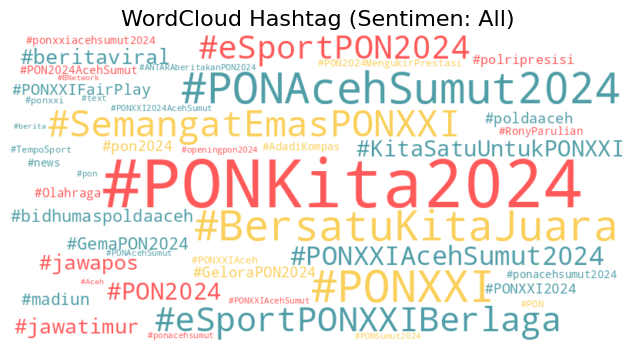

🔹 Frekuensi Penggunaan Hashtag (All):
                   Hashtag  Frekuensi
0            #PONKita2024        328
52                #PONXXI         99
30      #PONAcehSumut2024         94
53      #BersatuKitaJuara         88
165   #SemangatEmasPONXXI         64
134  #eSportPONXXIBerlaga         55
48         #eSportPON2024         50
64   #PONXXIAcehSumut2024         31
8                #PON2024         26
156  #KitaSatuUntukPONXXI         23
118              #jawapos         20
120            #jawatimur         20
119          #beritaviral         20
72     #bidhumaspoldaaceh         18
145          #GemaPON2024         18
278               #madiun         17
51        #PONXXIFairPlay         15
98               #pon2024         14
73             #poldaaceh         14
12         #GeloraPON2024         14 



In [ ]:
# Semua sentimen
df_hashtag_all = plot_hashtag_wordcloud_by_sentiment(df_analisis, sentiment_filter='All')
print("🔹 Frekuensi Penggunaan Hashtag (All):\n", df_hashtag_all.head(20), '\n')

<h2> Poin-Poin Utama:

1. **#PONKita2024** mendominasi penggunaan, mencerminkan kampanye besar yang berfokus pada semangat kebersamaan dan nasionalisme.
2. **#PONXXI** dan **#PONAcehSumut2024** menunjukkan identitas edisi PON serta lokasi penyelenggaraan di Aceh dan Sumut.
3. **#BersatuKitaJuara** menunjukkan semangat persatuan dan optimisme untuk meraih kemenangan.
4. **#SemangatEmasPONXXI** fokus pada pencapaian prestasi dan medali emas.
5. Hashtag terkait **eSports** seperti **#eSportPONXXIBerlaga** dan **#eSportPON2024** menunjukkan perhatian terhadap cabang olahraga digital.
6. Beberapa hashtag dengan frekuensi rendah seperti **#jawapos** dan **#madiun** terkait dengan media dan lokasi spesifik.

<h2> Kesimpulan Insight:

Dari data ini, dapat disimpulkan bahwa PON 2024 tidak hanya dipandang sebagai ajang olahraga, tetapi juga sebagai simbol kebersamaan dan semangat nasionalisme. Hashtag yang paling banyak digunakan, seperti **#PONKita2024**, menggambarkan bagaimana masyarakat merasa terhubung dengan event ini sebagai perayaan bersama.

Selain itu, ada fokus besar pada **prestasi**, yang terlihat dari hashtag **#SemangatEmasPONXXI**. Masyarakat berharap untuk melihat Indonesia meraih kemenangan, khususnya di cabang-cabang yang paling bergengsi.

Keberadaan hashtag tentang **eSports** juga menunjukkan pergeseran dalam dunia olahraga, di mana olahraga digital kini turut mendapatkan perhatian, dengan semakin banyaknya orang yang tertarik pada kompetisi ini di PON 2024.

Terakhir, penggunaan hashtag yang berkaitan dengan **lokasi** seperti **#PONAcehSumut2024** mengindikasikan bahwa publik juga sangat memperhatikan tempat penyelenggaraan acara, menyoroti pentingnya tuan rumah dalam kesuksesan PON 2024.


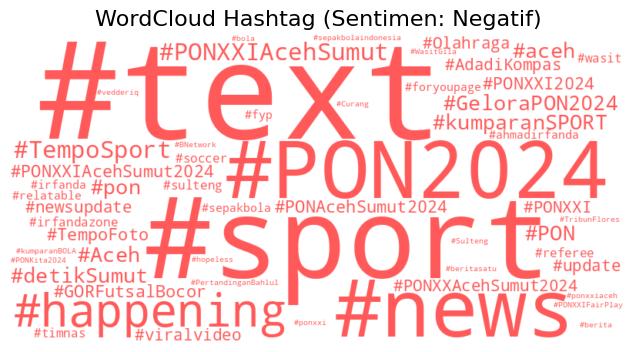

🔴 Frekuensi Penggunaan Hashtag (Negatif):
                  Hashtag  Frekuensi
31                 #text          6
22              #PON2024          4
16                #sport          4
25                 #news          4
41      #PONXXIAcehSumut          4
32            #happening          4
71           #TempoSport          4
0         #GeloraPON2024          3
8                   #pon          3
6                  #aceh          3
54                  #PON          3
36        #kumparanSPORT          3
55                 #Aceh          3
75           #detikSumut          3
79               #PONXXI          2
85           #viralvideo          2
51  #PONXXIAcehSumut2024          2
50           #PONXXI2024          2
65               #update          2
64           #newsupdate          2 



In [ ]:
# Sentimen Negatif
df_hashtag_neg = plot_hashtag_wordcloud_by_sentiment(df_analisis, sentiment_filter='Negatif')
print("🔴 Frekuensi Penggunaan Hashtag (Negatif):\n", df_hashtag_neg.head(20), '\n')

<h2> Poin-Poin Utama:

1. **#PON2024** dan **#PONXXIAcehSumut** masing-masing muncul dengan frekuensi 4, menandakan bahwa sentimen negatif yang terhubung dengan PON 2024 dan lokasi Aceh-Sumut menjadi perhatian penting.
2. **Hashtag media dan berita** seperti **#TempoSport**, **#kumparanSPORT**, **#detikSumut**, **#news**, dan **#newsupdate** menunjukkan adanya ketidakpuasan yang dikaitkan dengan pelaporan media mengenai PON 2024, yang mungkin menyiratkan kritik terhadap cara peliputan atau informasi yang kurang memadai.
3. **#sport**, **#PON**, **#PONXXI** muncul dengan frekuensi lebih rendah, namun tetap relevan untuk menunjukkan bahwa kritik ini masih terkait erat dengan pelaksanaan acara olahraga secara umum.
4. **#viralvideo** dan **#happening** yang muncul dengan frekuensi 2 atau 3 kali mengindikasikan bahwa banyak orang mungkin mengaitkan sentimen negatif dengan kejadian atau isu tertentu yang viral, dan berkaitan dengan peristiwa yang sedang terjadi selama PON 2024.

<h2> Kesimpulan Insight:

Sentimen negatif lebih sering berkaitan dengan **#PON2024** dan **#PONXXIAcehSumut**, yang menunjukkan adanya ketidakpuasan terhadap pelaksanaan PON di Aceh dan Sumatera Utara. Mungkin ada masalah dalam aspek logistik, organisasi, atau fasilitas yang mengurangi pengalaman positif bagi peserta dan penonton.
   
Penggunaan hashtag media seperti **#TempoSport**, **#kumparanSPORT**, dan **#detikSumut** menunjukkan bahwa media berperan dalam membentuk sentimen negatif, yang bisa jadi disebabkan oleh peliputan yang kurang memadai atau pemberitaan yang lebih fokus pada hal-hal negatif dari acara tersebut.
   
Hashtag **#viralvideo** dan **#happening** mengindikasikan bahwa sentimen negatif sebagian besar mungkin dipicu oleh kejadian atau konten tertentu yang menjadi viral, mungkin terkait dengan kontroversi atau permasalahan yang terjadi selama PON 2024.

Secara keseluruhan, sentimen negatif tampaknya lebih berfokus pada masalah pelaksanaan PON 2024, khususnya terkait lokasi penyelenggaraan dan cara acara ini diberitakan oleh media.


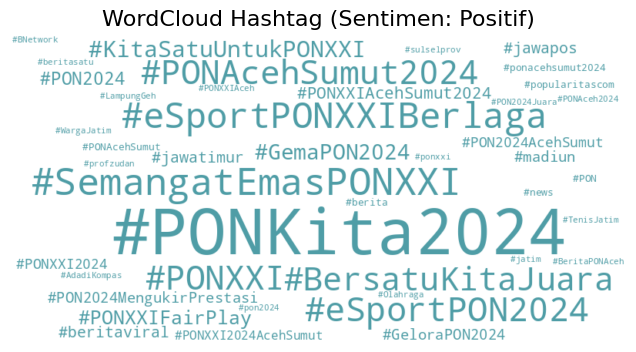

🟢 Frekuensi Penggunaan Hashtag (Positif):
                      Hashtag  Frekuensi
0               #PONKita2024        321
74       #SemangatEmasPONXXI         63
59      #eSportPONXXIBerlaga         55
14            #eSportPON2024         50
15         #PONAcehSumut2024         47
16                   #PONXXI         46
17         #BersatuKitaJuara         43
89      #KitaSatuUntukPONXXI         19
68              #GemaPON2024         17
84           #PONXXIFairPlay         13
7                   #PON2024         11
24      #PONXXIAcehSumut2024          9
50              #beritaviral          8
49                  #jawapos          8
51                #jawatimur          8
97                   #madiun          7
58  #PON2024MengukirPrestasi          7
10            #GeloraPON2024          7
6                #PONXXI2024          6
8          #PON2024AcehSumut          6 



In [ ]:
# Sentimen Positif
df_hashtag_pos = plot_hashtag_wordcloud_by_sentiment(df_analisis, sentiment_filter='Positif')
print("🟢 Frekuensi Penggunaan Hashtag (Positif):\n", df_hashtag_pos.head(20), '\n')

<h2>Poin-Poin Utama:

1. **#PONKita2024** mendominasi penggunaan dengan 321 frekuensi, menandakan bahwa hashtag ini menjadi simbol utama dan sangat terkait dengan semangat positif terkait PON 2024.
2. **#SemangatEmasPONXXI** dengan 63 frekuensi menunjukkan bahwa banyak orang mengaitkan PON 2024 dengan semangat untuk meraih prestasi dan medali emas.
3. **Hashtag terkait eSports**, seperti **#eSportPONXXIBerlaga** (55 frekuensi) dan **#eSportPON2024** (50 frekuensi), menunjukkan bahwa aspek olahraga digital mendapat perhatian besar dalam pelaksanaan PON 2024.
4. **#PONAcehSumut2024** (47 frekuensi) menonjolkan lokasi penyelenggaraan PON di Aceh dan Sumatera Utara, yang mendapat sambutan positif dari publik.
5. **#PONXXI** dan **#BersatuKitaJuara** dengan frekuensi masing-masing 46 dan 43 menekankan pada semangat persatuan dan optimisme yang tinggi terhadap keberhasilan PON.
6. **Hashtag dengan frekuensi lebih rendah** seperti **#KitaSatuUntukPONXXI**, **#GemaPON2024**, dan **#PONXXIFairPlay** menunjukkan partisipasi dan dukungan terhadap nilai-nilai positif dalam pelaksanaan PON 2024.

<h2> Kesimpulan Insight:

**#PONKita2024** menjadi simbol utama semangat kebersamaan dan nasionalisme. Hashtag ini menunjukkan bahwa masyarakat menganggap PON 2024 sebagai ajang yang mempererat rasa persatuan dan kesatuan di seluruh Indonesia.
   
**#SemangatEmasPONXXI** menunjukkan bahwa banyak orang memiliki harapan tinggi untuk melihat Indonesia meraih medali emas dalam berbagai cabang olahraga. Hal ini mencerminkan optimisme yang besar terhadap pencapaian prestasi di PON 2024.
   
Terdapat perhatian yang besar terhadap eSports, terlihat dari hashtag **#eSportPONXXIBerlaga** dan **#eSportPON2024**, yang menunjukkan bahwa cabang olahraga ini semakin diterima dan mendapat tempat di dalam perhelatan PON.

**#PONAcehSumut2024** mengindikasikan bahwa publik memberikan apresiasi kepada tuan rumah, Aceh dan Sumatera Utara, atas penyelenggaraan PON 2024. Ini menunjukkan bahwa lokasi juga menjadi faktor penting dalam sentimen positif.

**#BersatuKitaJuara** dan **#KitaSatuUntukPONXXI** menunjukkan bahwa masyarakat mendukung semangat persatuan, baik dalam aspek olahraga maupun dalam menjunjung tinggi fair play dan sportivitas dalam ajang ini.

Secara keseluruhan, sentimen positif yang terkait dengan PON 2024 mencerminkan semangat kebersamaan, optimisme untuk meraih prestasi, serta dukungan terhadap perkembangan olahraga, termasuk eSports.


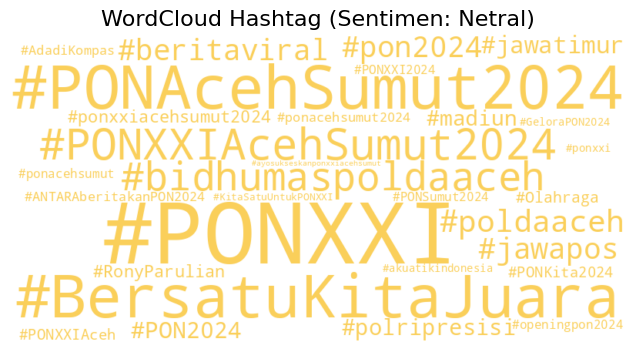

🟡 Frekuensi Penggunaan Hashtag (Netral):
                   Hashtag  Frekuensi
13                #PONXXI         51
42      #PONAcehSumut2024         45
32      #BersatuKitaJuara         44
85   #PONXXIAcehSumut2024         20
10     #bidhumaspoldaaceh         17
11             #poldaaceh         13
29               #pon2024         12
147              #jawapos         12
149          #beritaviral         12
150            #jawatimur         12
4                #PON2024         11
12          #polripresisi         11
148               #madiun         10
22   #ponxxiacehsumut2024          9
174         #RonyParulian          9
1               #Olahraga          7
110           #PONXXIAceh          6
0            #PONKita2024          6
118         #ponacehsumut          5
103       #openingpon2024          5 



In [ ]:
# Sentimen Netral
df_hashtag_net = plot_hashtag_wordcloud_by_sentiment(df_analisis, sentiment_filter='Netral')
print("🟡 Frekuensi Penggunaan Hashtag (Netral):\n", df_hashtag_net.head(20), '\n')

<h2>Poin-Poin Utama:

1. **#PONXXI** (51 frekuensi) adalah hashtag yang paling sering digunakan, mencerminkan identitas edisi PON yang sedang berlangsung (PON 2024).
2. **#PONAcehSumut2024** (45 frekuensi) dan **#PONXXIAcehSumut2024** (20 frekuensi) menyoroti lokasi penyelenggaraan PON 2024 di Aceh dan Sumatera Utara, yang menjadi pusat perhatian meskipun sentimen yang muncul lebih netral.
3. **#BersatuKitaJuara** (44 frekuensi) menunjukkan bahwa ada penekanan pada semangat kebersamaan dan persatuan, meski tidak dalam bentuk sentimen kuat (positif atau negatif).
4. Hashtag terkait dengan **media dan berita** seperti **#jawapos**, **#beritaviral**, dan **#jawatimur** (12 frekuensi) menunjukkan adanya pelaporan yang lebih objektif atau tidak terlalu emosional terkait PON 2024.
5. **#pon2024** (12 frekuensi) dan variasi lainnya seperti **#ponxxiacehsumut2024** menunjukkan kesadaran publik yang lebih luas terkait pelaksanaan event ini tanpa ekspresi sentimen yang terlalu jelas.
6. **Hashtag terkait dengan keamanan** seperti **#bidhumaspoldaaceh** dan **#poldaaceh** (13 dan 17 frekuensi) menunjukkan perhatian terhadap aspek keamanan atau kegiatan terkait aparat selama acara berlangsung.

<h2>Kesimpulan Insight:

Hashtag **#PONXXI** dan **#PONAcehSumut2024** mendominasi penggunaan dan menunjukkan bahwa perhatian utama lebih tertuju pada pelaksanaan event PON 2024 itu sendiri, serta lokasi penyelenggaraannya, tanpa adanya emosi yang terlalu kuat (positif atau negatif).

**#BersatuKitaJuara** menjadi simbol semangat kebersamaan yang lebih objektif dan netral, tanpa terkesan terlalu optimistis atau pesimistis. Hal ini bisa mengindikasikan bahwa meskipun ada semangat yang ditonjolkan, tidak ada tekanan yang terlalu kuat terhadap keberhasilan atau kegagalan.
   
Penggunaan hashtag seperti **#jawapos**, **#beritaviral**, dan **#jawatimur** menunjukkan bahwa banyak informasi yang dibagikan bersifat lebih faktual atau informatif, tanpa ada konotasi emosional yang jelas. Media cenderung memberikan pelaporan yang lebih seimbang atau tidak berpihak.
   
Hashtag terkait dengan **keamanan** seperti **#bidhumaspoldaaceh** dan **#poldaaceh** mengindikasikan adanya perhatian terhadap aspek logistik dan keamanan selama pelaksanaan PON 2024, namun tetap disampaikan dalam konteks yang lebih netral tanpa adanya reaksi emosional yang kuat.

Secara keseluruhan, sentimen netral dalam penggunaan hashtag terkait PON 2024 menunjukkan bahwa banyak perhatian yang terfokus pada pelaksanaan acara itu sendiri, keamanan, serta pelaporan yang lebih objektif oleh media. Terdapat sedikit ekspresi emosional yang terlibat dalam percakapan ini, mencerminkan sikap yang lebih pragmatis atau observasional terhadap event tersebut.


In [ ]:
df_analisis.head()

,username,full_text,Label,cleaned_text,casefolding_text,norm_text,token_text,swremove_text,stem_text,Sentimen,mention,hashtag
0,bakidin_jayadi,Keindahan venue PON 2024 membuat setiap pertan...,1,Keindahan venue PON membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,keindahan venue pon membuat setiap pertandinga...,"[keindahan, venue, pon, membuat, setiap, perta...","[keindahan, venue, pon, membuat, pertandingan,...",indah venue pon buat tanding asa lebih magis,Positif,[],[#PONKita2024]
1,anik_karolina12,PON 2024 bakal jadi event yang paling dinantik...,1,PON bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,pon bakal jadi event yang paling dinantikan de...,"[pon, bakal, jadi, event, yang, paling, dinant...","[pon, bakal, jadi, event, paling, dinantikan, ...",pon bakal jadi event paling nanti venue sudah ...,Positif,[],[#PONKita2024]
2,calista_nurai,Pertandingan demi pertandingan di eSPORT PON A...,0,Pertandingan demi pertandingan di eSPORT PON A...,pertandingan demi pertandingan di esport pon a...,pertandingan demi pertandingan di esport pon a...,"[pertandingan, demi, pertandingan, di, esport,...","[pertandingan, pertandingan, esport, pon, aceh...",tanding tanding esport pon aceh sumut prediksi...,Netral,[],[#PONKita2024]
3,hariankompas,Jatim meraih medali emas pada seluruh nomor di...,0,Jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,jatim meraih medali emas pada seluruh nomor di...,"[jatim, meraih, medali, emas, pada, seluruh, n...","[jatim, meraih, medali, emas, seluruh, nomor, ...",jatim raih medali emas seluruh nomor cabang te...,Netral,[],"[#Olahraga, #AdadiKompas]"
4,NasionalBerita_,@recehtapisayng Yah sayang banget ya Saaih Hal...,-1,Yah sayang banget ya Saaih Halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,yah sayang banget ya saaih halilintar gagal ta...,"[yah, sayang, banget, ya, saaih, halilintar, g...","[yah, sayang, banget, saaih, halilintar, gagal...",yah sayang banget saaih halilintar gagal tampi...,Negatif,[@recehtapisayng],[]


In [ ]:
df_analisis.to_csv('data_baru_analisis.csv', index=False)


# <center> END </center>